In [489]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import os 
import sys
import warnings
warnings.simplefilter(action = 'ignore')

In [490]:
crime_data = pd.read_csv('/0.ITstudy/9.pandas_project/Detroit_2016.csv')


In [491]:
crime_data.head()

,Unnamed: 0,Crime ID,Report #,Incident Address,Offense Description,Offense Category,Arrest Charge,Charge Description,State Offense Code,Incident Date & Time,...,Precinct Number,Census Block GEOID,Neighborhood,Council District,Zip Code,Longitude,Latitude,IBR Report Date,Location,uniq
0,325,3108829,1708240413,18200 block of MANSFIELD ST,ASSAULT AND BATTERY/SIMPLE ASSAULT,ASSAULT,13001,ASSAULT AND BATTERY/SIMPLE ASSAULT,1301,11/20/2016 12:00:00 PM,...,8,2.616350e+14,College Park,2.0,NaN,-83.206111,42.423438,08/26/2017 09:52:03 AM,"location\r\n(42.42344, -83.20611)","59,357"
1,1036,3116797,1709130179,7900 block of HARTWICK ST,LARCENY - OTHER,LARCENY,23007,LARCENY - OTHER,2307,03/09/2016 12:00:00 AM,...,3,2.616400e+14,Russell Industrial,5.0,NaN,-83.060791,42.380547,09/14/2017 08:28:25 AM,"location\r\n(42.38055, -83.06079)","63,817"
2,1118,3005365,1612230008,Corner of W 7 MILE RD and TELEGRAPH RD,AGGRAVATED / FELONIOUS ASSAULT,AGGRAVATED ASSAULT,13002,AGGRAVATED / FELONIOUS ASSAULT,1302,12/22/2016 11:50:00 PM,...,8,2.616350e+14,Seven Mile-Rouge,1.0,NaN,-83.277544,42.428957,01/27/2017 03:08:19 PM,"location\r\n(42.42896, -83.27754)","3,096"
3,1282,3007218,1612280364,1700 block of MICHIGAN AVE,LARCENY - PERSONAL PROPERTY FROM MOTOR VEHICLE,LARCENY,23005,LARCENY - PERSONAL PROPERTY FROM MOTOR VEHICLE,2305,12/28/2016 08:30:00 PM,...,3,2.616350e+14,Corktown,6.0,NaN,-83.069540,42.331420,01/27/2017 03:08:19 PM,"location\r\n(42.33142, -83.06954)","4,196"
4,1371,3008368,1612310290,19200 block of W 8 MILE RD,LARCENY - PERSONAL PROPERTY FROM MOTOR VEHICLE,LARCENY,23005,LARCENY - PERSONAL PROPERTY FROM MOTOR VEHICLE,2305,12/31/2016 01:00:00 AM,...,8,2.616350e+14,O'Hair Park,1.0,NaN,-83.232364,42.443863,01/27/2017 03:08:19 PM,"location\r\n(42.44386, -83.23236)","4,883"


In [492]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6003 entries, 0 to 6002
Data columns (total 25 columns):
Unnamed: 0                   6003 non-null int64
Crime ID                     6003 non-null int64
Report #                     6003 non-null object
Incident Address             6003 non-null object
Offense Description          6003 non-null object
Offense Category             6003 non-null object
Arrest Charge                6003 non-null object
Charge Description           6003 non-null object
State Offense Code           6003 non-null int64
Incident Date & Time         6003 non-null object
Incident Time (24h)          6003 non-null int64
Day of Week (Sunday is 1)    6003 non-null int64
Hour of Day                  6003 non-null int64
Year                         6003 non-null int64
Scout Car Area               6003 non-null int64
Precinct Number              6003 non-null int64
Census Block GEOID           5982 non-null float64
Neighborhood                 5938 non-null object
C

In [493]:
crime_data.isnull().any()

Unnamed: 0                   False
Crime ID                     False
Report #                     False
Incident Address             False
Offense Description          False
Offense Category             False
Arrest Charge                False
Charge Description           False
State Offense Code           False
Incident Date & Time         False
Incident Time (24h)          False
Day of Week (Sunday is 1)    False
Hour of Day                  False
Year                         False
Scout Car Area               False
Precinct Number              False
Census Block GEOID            True
Neighborhood                  True
Council District              True
Zip Code                      True
Longitude                     True
Latitude                      True
IBR Report Date              False
Location                      True
uniq                         False
dtype: bool

In [494]:
crime_data.columns

Index(['Unnamed: 0', 'Crime ID', 'Report #', 'Incident Address',
       'Offense Description', 'Offense Category', 'Arrest Charge',
       'Charge Description', 'State Offense Code', 'Incident Date & Time',
       'Incident Time (24h)', 'Day of Week (Sunday is 1)', 'Hour of Day',
       'Year', 'Scout Car Area', 'Precinct Number', 'Census Block GEOID',
       'Neighborhood', 'Council District', 'Zip Code', 'Longitude', 'Latitude',
       'IBR Report Date', 'Location', 'uniq'],
      dtype='object')

In [495]:
crime_data['Offense Category'].unique()

array(['ASSAULT', 'LARCENY', 'AGGRAVATED ASSAULT', 'ROBBERY', 'OUIL',
       'WEAPONS OFFENSES', 'DAMAGE TO PROPERTY', 'MISCELLANEOUS',
       'BURGLARY', 'FRAUD', 'DISORDERLY CONDUCT', 'DANGEROUS DRUGS',
       'STOLEN VEHICLE', 'SEX OFFENSES', 'HOMICIDE', 'STOLEN PROPERTY',
       'FAMILY OFFENSE', 'SEXUAL ASSAULT', 'OBSTRUCTING JUDICIARY',
       'KIDNAPPING', 'FORGERY', 'EXTORTION', 'ARSON', 'OTHER', 'RUNAWAY',
       'LIQUOR', 'OBSTRUCTING THE POLICE', 'SOLICITATION'], dtype=object)

In [496]:
len(crime_data['Offense Category'].unique())

28

In [497]:
crime_data.loc[(crime_data['Offense Category'] =='HOMICIDE'),'Offense Category'].count()

9

In [498]:
def year_ex(x):
    year_reg = re.compile(r'\d{4}')
    return(year_reg.findall(x)[0])
def month_ex(x):
    month_reg = re.compile(r'\d{2}/\d{2}')
    return(month_reg.findall(x)[0])
def time_ex(x):
    time_reg = re.compile(r'\d{2}:\d{2}:\d{2}')
    return(time_reg.findall(x)[0])
def day_night(x):
    day_reg = re.compile(r'[A-Z]+')
    return(day_reg.findall(x)[0])

In [499]:
month_ex('11/20/2016 12:00:00 PM')
time_ex('11/20/2016 12:00:00 PM')
day_night('11/20/2016 12:00:00 PM')

'PM'

In [500]:
dummy = crime_data.copy()
dummy['year']  = dummy['Incident Date & Time'].apply(year_ex).astype(int)
dummy['month'] = dummy['Incident Date & Time'].apply(month_ex)
dummy['time'] = dummy['Incident Date & Time'].apply(time_ex)
dummy['day'] = dummy['Incident Date & Time'].apply(day_night)
dummy[['time','month']] = dummy[['time','month']] .replace({'/':'',':':''},regex = True).astype('int64')

In [501]:
dummy.shape

(6003, 29)

In [502]:
dummy.head()

,Unnamed: 0,Crime ID,Report #,Incident Address,Offense Description,Offense Category,Arrest Charge,Charge Description,State Offense Code,Incident Date & Time,...,Zip Code,Longitude,Latitude,IBR Report Date,Location,uniq,year,month,time,day
0,325,3108829,1708240413,18200 block of MANSFIELD ST,ASSAULT AND BATTERY/SIMPLE ASSAULT,ASSAULT,13001,ASSAULT AND BATTERY/SIMPLE ASSAULT,1301,11/20/2016 12:00:00 PM,...,NaN,-83.206111,42.423438,08/26/2017 09:52:03 AM,"location\r\n(42.42344, -83.20611)","59,357",2016,1120,120000,PM
1,1036,3116797,1709130179,7900 block of HARTWICK ST,LARCENY - OTHER,LARCENY,23007,LARCENY - OTHER,2307,03/09/2016 12:00:00 AM,...,NaN,-83.060791,42.380547,09/14/2017 08:28:25 AM,"location\r\n(42.38055, -83.06079)","63,817",2016,309,120000,AM
2,1118,3005365,1612230008,Corner of W 7 MILE RD and TELEGRAPH RD,AGGRAVATED / FELONIOUS ASSAULT,AGGRAVATED ASSAULT,13002,AGGRAVATED / FELONIOUS ASSAULT,1302,12/22/2016 11:50:00 PM,...,NaN,-83.277544,42.428957,01/27/2017 03:08:19 PM,"location\r\n(42.42896, -83.27754)","3,096",2016,1222,115000,PM
3,1282,3007218,1612280364,1700 block of MICHIGAN AVE,LARCENY - PERSONAL PROPERTY FROM MOTOR VEHICLE,LARCENY,23005,LARCENY - PERSONAL PROPERTY FROM MOTOR VEHICLE,2305,12/28/2016 08:30:00 PM,...,NaN,-83.069540,42.331420,01/27/2017 03:08:19 PM,"location\r\n(42.33142, -83.06954)","4,196",2016,1228,83000,PM
4,1371,3008368,1612310290,19200 block of W 8 MILE RD,LARCENY - PERSONAL PROPERTY FROM MOTOR VEHICLE,LARCENY,23005,LARCENY - PERSONAL PROPERTY FROM MOTOR VEHICLE,2305,12/31/2016 01:00:00 AM,...,NaN,-83.232364,42.443863,01/27/2017 03:08:19 PM,"location\r\n(42.44386, -83.23236)","4,883",2016,1231,10000,AM


In [503]:
print('Arrest Charge unique : ',len(dummy['Arrest Charge'].unique()))
print('State Offense Code : ',len(dummy['State Offense Code'].unique()))

Arrest Charge unique :  73
State Offense Code :  61


In [504]:
dummy.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6003 entries, 0 to 6002
Data columns (total 29 columns):
Unnamed: 0                   6003 non-null int64
Crime ID                     6003 non-null int64
Report #                     6003 non-null object
Incident Address             6003 non-null object
Offense Description          6003 non-null object
Offense Category             6003 non-null object
Arrest Charge                6003 non-null object
Charge Description           6003 non-null object
State Offense Code           6003 non-null int64
Incident Date & Time         6003 non-null object
Incident Time (24h)          6003 non-null int64
Day of Week (Sunday is 1)    6003 non-null int64
Hour of Day                  6003 non-null int64
Year                         6003 non-null int64
Scout Car Area               6003 non-null int64
Precinct Number              6003 non-null int64
Census Block GEOID           5982 non-null float64
Neighborhood                 5938 non-null object
C

In [505]:
dummy.loc[(dummy['Offense Category'] =='LIQUOR'),'Offense Category'].count()

9

In [506]:
liq_list =dummy.loc[(dummy['Offense Category'] == 'LIQUOR')]

In [507]:
run_list =dummy.loc[(dummy['Offense Category'] == 'RUNAWAY')]

In [508]:
pol_list =dummy.loc[(dummy['Offense Category'] == 'OBSTRUCTING THE POLICE')]

In [509]:
print('LIQUOR :', liq_list.count()[0])
print('RUNAWAY :', run_list.count()[0])
print('POLICE :', pol_list.count()[0])


LIQUOR : 9
RUNAWAY : 9
POLICE : 4


In [510]:
liq_list.index

Int64Index([1397, 2047, 2053, 2739, 3901, 4048, 4055, 4769, 5022], dtype='int64')

In [511]:
try:
    dummy = dummy.drop(liq_list.index, axis = 0)
except:
    print('not contain')

In [512]:
try:
    dummy = dummy.drop(run_list.index, axis = 0)
except:
    print('not contain')

In [513]:
try:
    dummy = dummy.drop(pol_list.index, axis = 0)
except:
    print('not contain')

In [514]:
dummy.shape

(5981, 29)

In [515]:
dummy.loc[(dummy['Offense Category'] =='LIQUOR')]

,Unnamed: 0,Crime ID,Report #,Incident Address,Offense Description,Offense Category,Arrest Charge,Charge Description,State Offense Code,Incident Date & Time,...,Zip Code,Longitude,Latitude,IBR Report Date,Location,uniq,year,month,time,day


In [516]:
dummy.loc[(dummy['Offense Category'] =='RUNAWAY')]

,Unnamed: 0,Crime ID,Report #,Incident Address,Offense Description,Offense Category,Arrest Charge,Charge Description,State Offense Code,Incident Date & Time,...,Zip Code,Longitude,Latitude,IBR Report Date,Location,uniq,year,month,time,day


In [517]:
dummy.loc[(dummy['Offense Category'] =='OBSTRUCTING THE POLICE')]

,Unnamed: 0,Crime ID,Report #,Incident Address,Offense Description,Offense Category,Arrest Charge,Charge Description,State Offense Code,Incident Date & Time,...,Zip Code,Longitude,Latitude,IBR Report Date,Location,uniq,year,month,time,day


In [518]:
#dummy.to_csv('destroit_2016_edit.csv')

In [519]:
dummy[(dummy['Offense Category'] == 'FRAUD')].count()[0]/dummy.shape[0] * 100

12.840662096639358

In [520]:

#print(dummy.loc[(dummy['State Offense Code'][:] == (dummy['Arrest Charge'][:][:3]+dummy['Arrest Charge'][:][4]))])

In [521]:
%matplotlib inline
import seaborn as sns


In [522]:
dummy_crime = (dummy['Offense Category'])

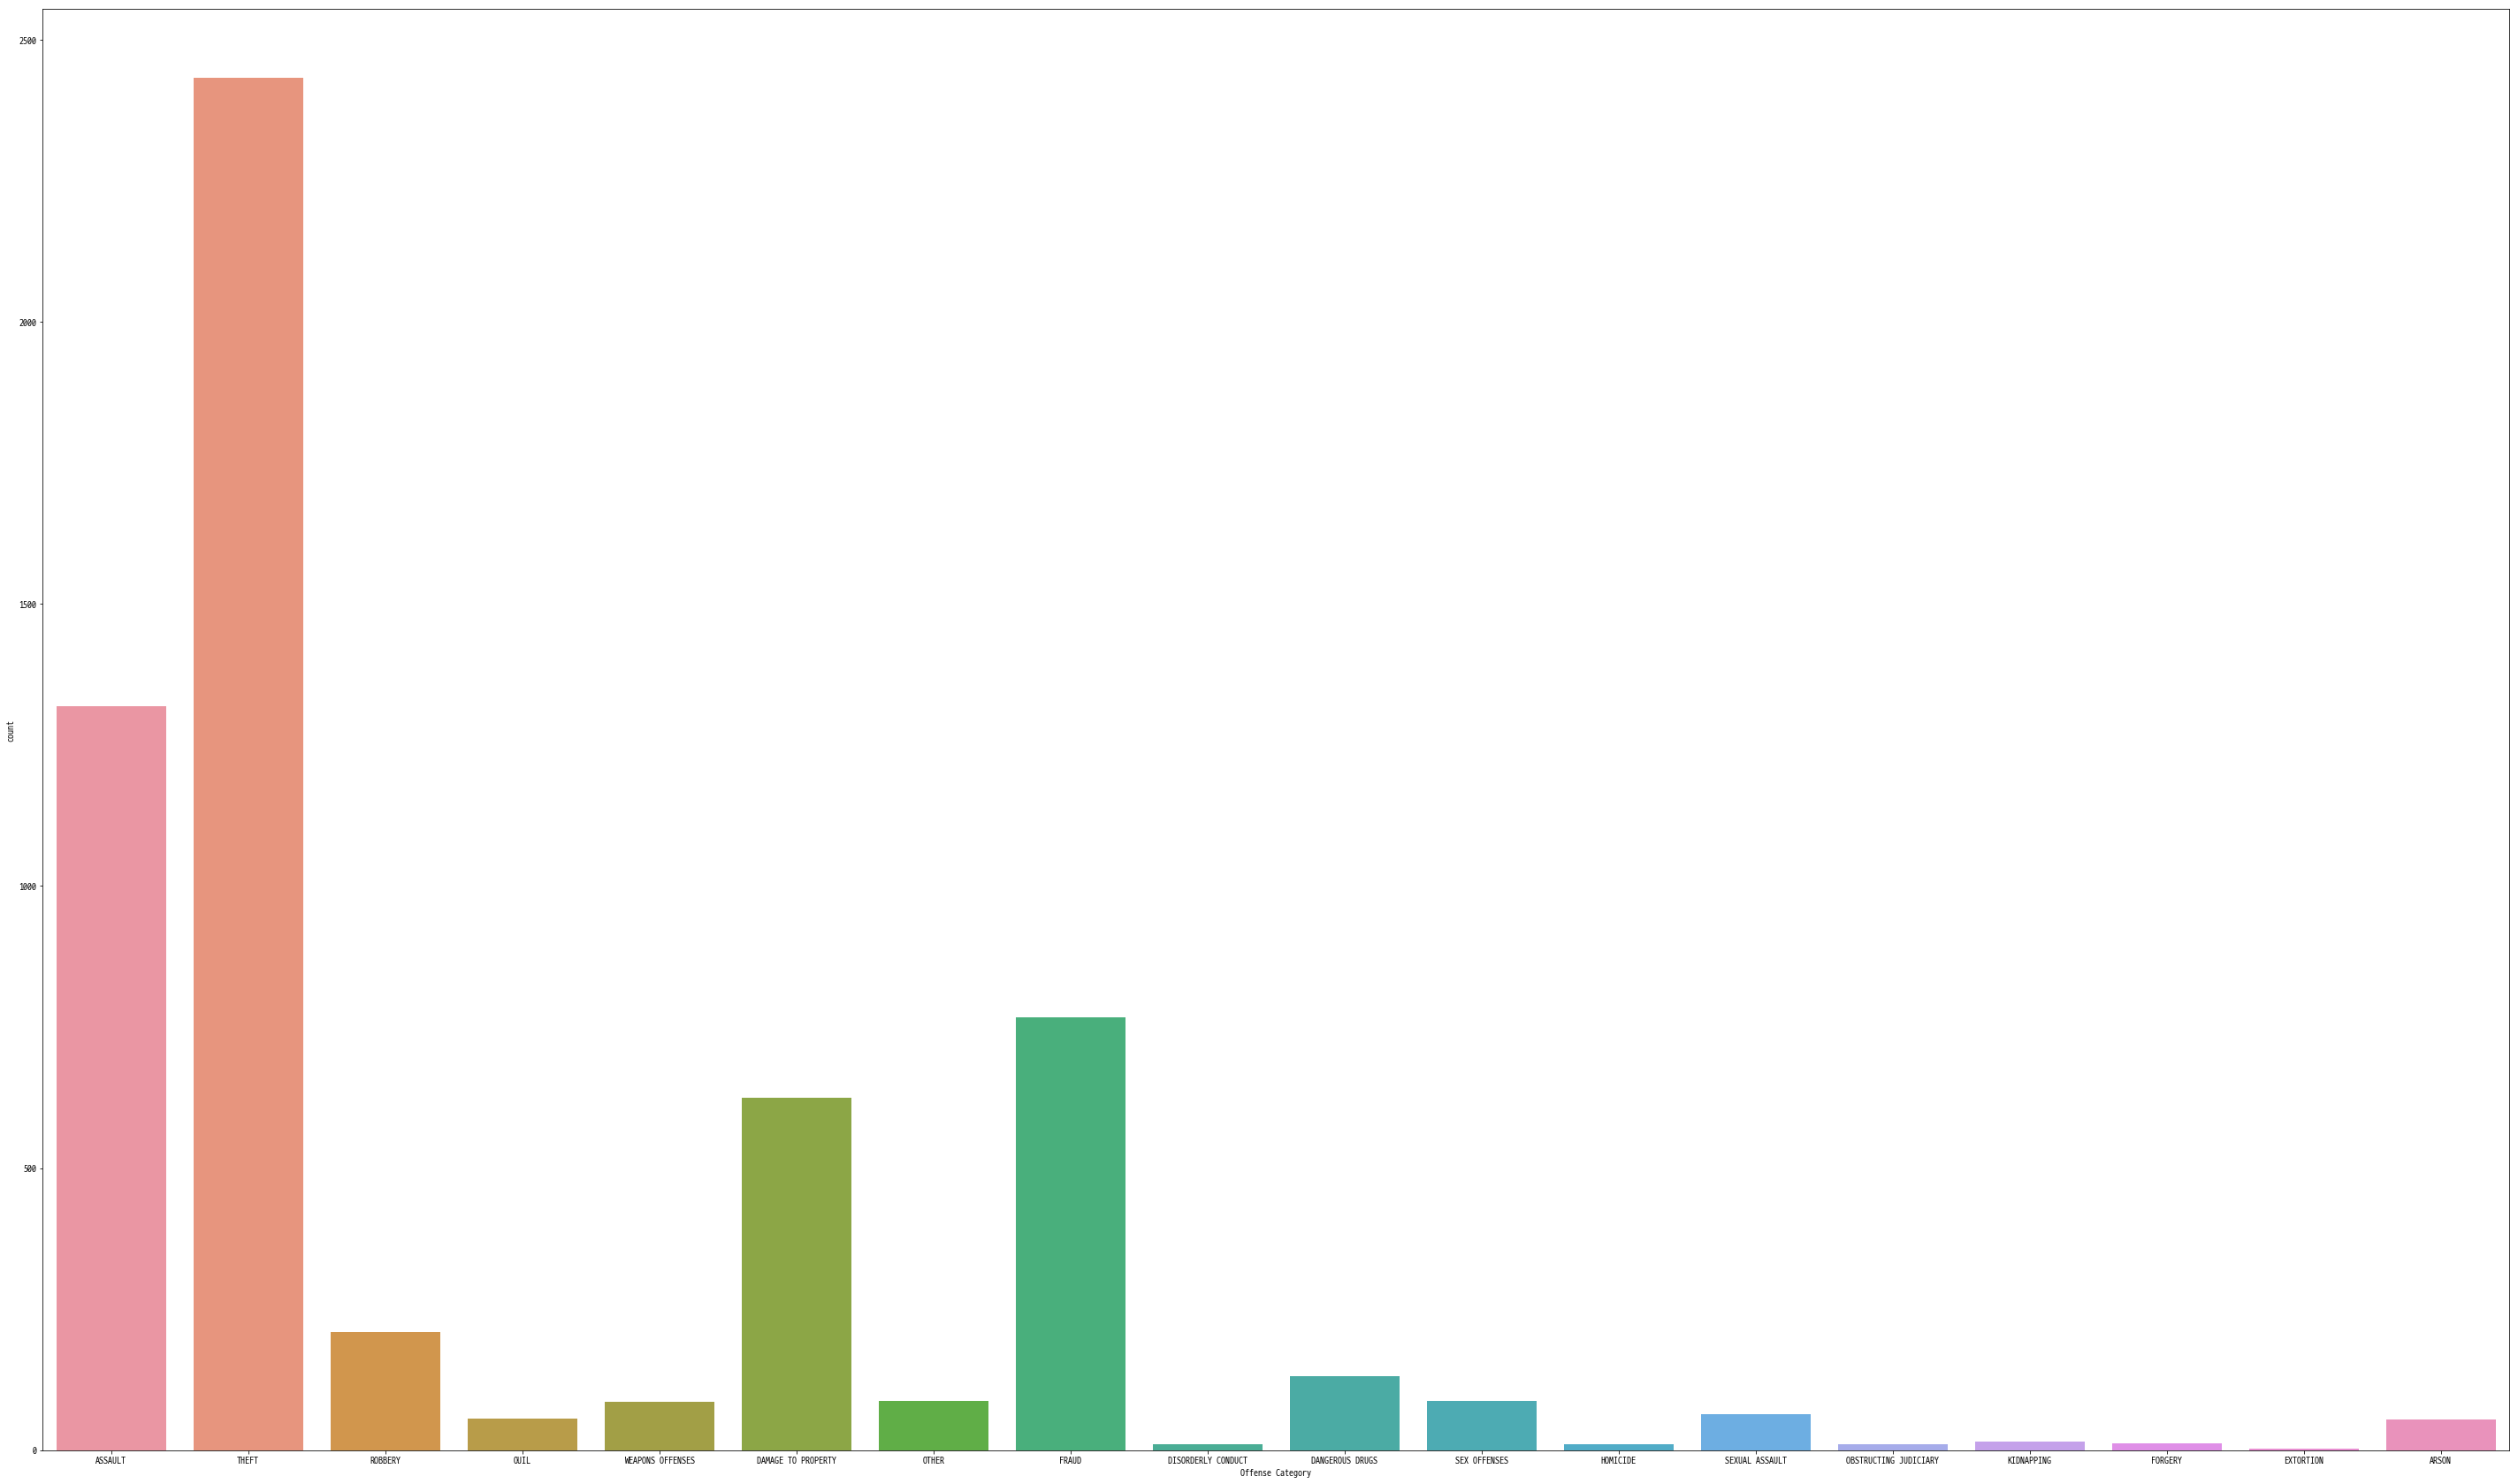

In [612]:
f,ax=plt.subplots(1,1,figsize=(50,30))

sns_plot = sns.countplot('Offense Category',data = dummy)
#fig = sns_plot.get_figure()
#fig.savefig('detroit_before_edit.png', dpi = 300)

In [524]:
dummy.loc[(dummy['Offense Category'] == 'JUSTIFIABLE HOMICIDE'),'Offense Category']= 'HOMICIDE'

In [525]:
dummy.loc[(dummy['Offense Category'] == 'SOLICITATION'),'Offense Category']= 'HOMICIDE'

In [526]:
dummy.loc[(dummy['Offense Category'] =='HOMICIDE'),'Offense Category'].count()

10

In [527]:
dummy.loc[(dummy['Offense Category'] =='SOLICITATAION'),'Offense Category'].count()

0

In [528]:
dummy.loc[(dummy['Offense Category'] == 'BURGLARY'),'Offense Category']= 'THEFT'

In [529]:
dummy.loc[(dummy['Offense Category'] == 'STOLEN PROPERTY'),'Offense Category']= 'THEFT'

In [530]:
dummy.loc[(dummy['Offense Category'] == 'LARCENY'),'Offense Category']= 'THEFT'

In [531]:
dummy.loc[(dummy['Offense Category'] == 'STOLEN VEHICLE'),'Offense Category']= 'THEFT'

In [532]:
assaults = ['FAMILY OFFENSE' ,'AGGRAVATED ASSAULT' ,'ASSAULT']
for i in assaults:
    dummy.loc[(dummy['Offense Category'] == i),'Offense Category']= 'ASSAULT'
    print(dummy.loc[(dummy['Offense Category'] == i),'Offense Category'].count())

0
0
1319


In [533]:
others = ['OTHER','MISCELLANEOUS']
for i in others:
    dummy.loc[(dummy['Offense Category'] == i),'Offense Category']= 'OTHER'
    print(dummy.loc[(dummy['Offense Category'] == i),'Offense Category'].count())

15
0


In [534]:
dummy['Offense Category'].unique()

array(['ASSAULT', 'THEFT', 'ROBBERY', 'OUIL', 'WEAPONS OFFENSES',
       'DAMAGE TO PROPERTY', 'OTHER', 'FRAUD', 'DISORDERLY CONDUCT',
       'DANGEROUS DRUGS', 'SEX OFFENSES', 'HOMICIDE', 'SEXUAL ASSAULT',
       'OBSTRUCTING JUDICIARY', 'KIDNAPPING', 'FORGERY', 'EXTORTION',
       'ARSON'], dtype=object)

In [535]:
det_rank_dict = {}
dummy.loc[(dummy['Offense Category'] =='HOMICIDE'),'Offense Category'].count()


10

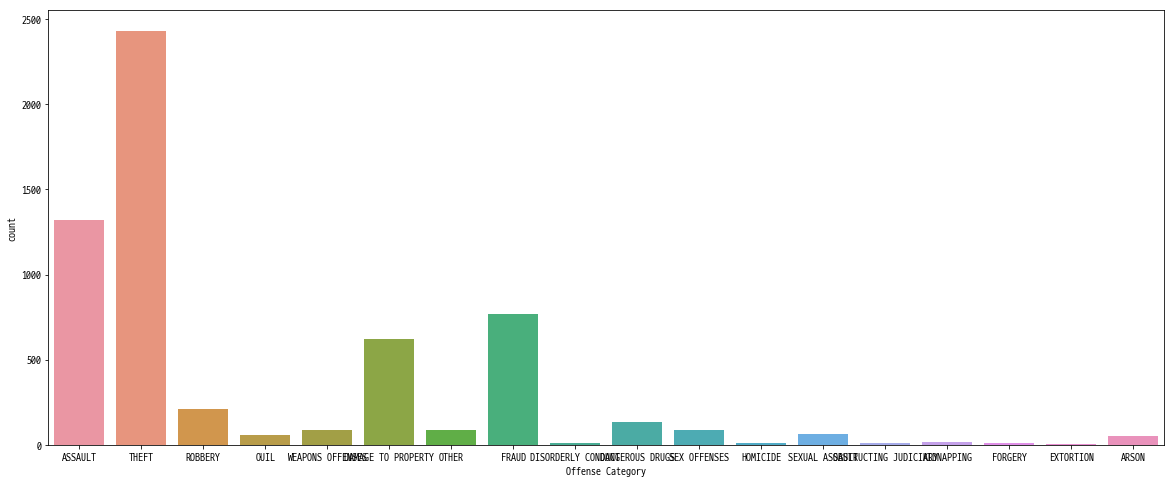

In [613]:
f,ax=plt.subplots(1,1,figsize=(20,8))

sns_plot = sns.countplot('Offense Category',data = dummy)
#fig = sns_plot.get_figure()
#fig.savefig('detroit_after_edit.png', dpi = 300)

In [537]:
dummy['Offense Category'].unique()

array(['ASSAULT', 'THEFT', 'ROBBERY', 'OUIL', 'WEAPONS OFFENSES',
       'DAMAGE TO PROPERTY', 'OTHER', 'FRAUD', 'DISORDERLY CONDUCT',
       'DANGEROUS DRUGS', 'SEX OFFENSES', 'HOMICIDE', 'SEXUAL ASSAULT',
       'OBSTRUCTING JUDICIARY', 'KIDNAPPING', 'FORGERY', 'EXTORTION',
       'ARSON'], dtype=object)

In [538]:
len(dummy['Offense Category'].unique())

18

In [539]:
len(crime_data['Offense Category'].unique())

28

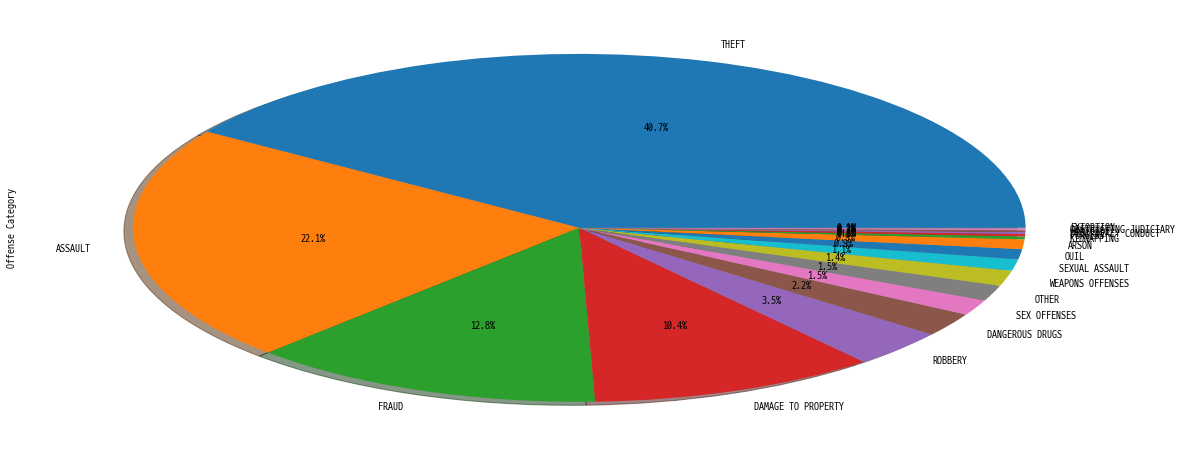

In [614]:
f,ax = plt.subplots(1,1,figsize = (20,8))
plt_pie =dummy['Offense Category'].value_counts().plot.pie(explode = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],autopct='%1.1f%%',ax = ax,shadow = True)
#fig = plt_pie.get_figure()
#fig.savefig('pic_pie.png', dpi = 300)

In [541]:
TOP_7 = ['THEFT' ,'ASSAULT' ,'FRAUD','DAMAGE TO PROPERTY','ROBBERY','DANGERS DRUGS','SEX OFFENSES']
for n,i in enumerate(TOP_7,start = 1):
    dummy.loc[(dummy['Offense Category'] == i),'RANKING']= n
dummy['RANKING']= dummy['RANKING'].fillna(8.0)

In [542]:
dummy['day']= dummy['day'].replace({'PM':1,'AM':0}).astype('int64')

In [543]:
dummy.head()

,Unnamed: 0,Crime ID,Report #,Incident Address,Offense Description,Offense Category,Arrest Charge,Charge Description,State Offense Code,Incident Date & Time,...,Longitude,Latitude,IBR Report Date,Location,uniq,year,month,time,day,RANKING
0,325,3108829,1708240413,18200 block of MANSFIELD ST,ASSAULT AND BATTERY/SIMPLE ASSAULT,ASSAULT,13001,ASSAULT AND BATTERY/SIMPLE ASSAULT,1301,11/20/2016 12:00:00 PM,...,-83.206111,42.423438,08/26/2017 09:52:03 AM,"location\r\n(42.42344, -83.20611)","59,357",2016,1120,120000,1,2.0
1,1036,3116797,1709130179,7900 block of HARTWICK ST,LARCENY - OTHER,THEFT,23007,LARCENY - OTHER,2307,03/09/2016 12:00:00 AM,...,-83.060791,42.380547,09/14/2017 08:28:25 AM,"location\r\n(42.38055, -83.06079)","63,817",2016,309,120000,0,1.0
2,1118,3005365,1612230008,Corner of W 7 MILE RD and TELEGRAPH RD,AGGRAVATED / FELONIOUS ASSAULT,ASSAULT,13002,AGGRAVATED / FELONIOUS ASSAULT,1302,12/22/2016 11:50:00 PM,...,-83.277544,42.428957,01/27/2017 03:08:19 PM,"location\r\n(42.42896, -83.27754)","3,096",2016,1222,115000,1,2.0
3,1282,3007218,1612280364,1700 block of MICHIGAN AVE,LARCENY - PERSONAL PROPERTY FROM MOTOR VEHICLE,THEFT,23005,LARCENY - PERSONAL PROPERTY FROM MOTOR VEHICLE,2305,12/28/2016 08:30:00 PM,...,-83.069540,42.331420,01/27/2017 03:08:19 PM,"location\r\n(42.33142, -83.06954)","4,196",2016,1228,83000,1,1.0
4,1371,3008368,1612310290,19200 block of W 8 MILE RD,LARCENY - PERSONAL PROPERTY FROM MOTOR VEHICLE,THEFT,23005,LARCENY - PERSONAL PROPERTY FROM MOTOR VEHICLE,2305,12/31/2016 01:00:00 AM,...,-83.232364,42.443863,01/27/2017 03:08:19 PM,"location\r\n(42.44386, -83.23236)","4,883",2016,1231,10000,0,1.0


In [544]:
len(dummy['RANKING'].unique())

7

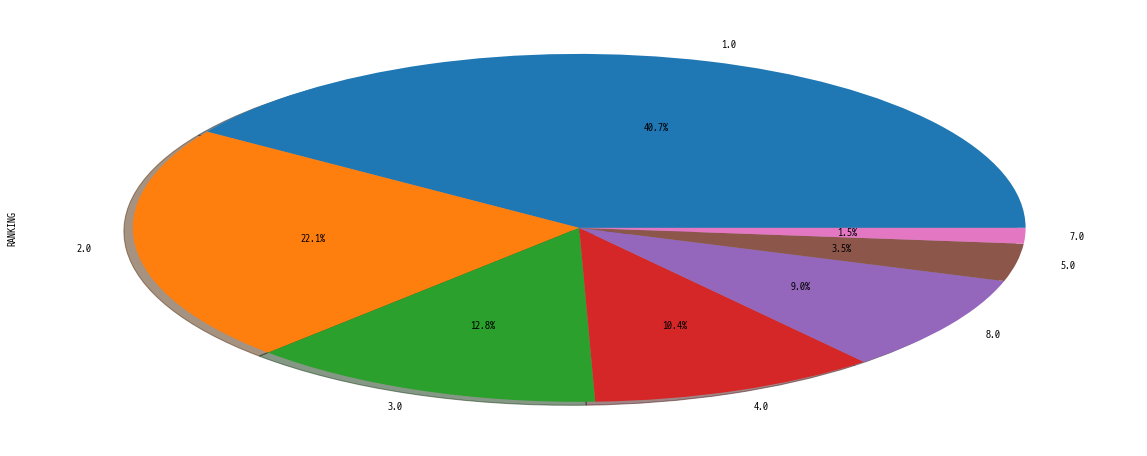

In [615]:
f,ax = plt.subplots(1,1,figsize = (20,8))
plt_pie =dummy['RANKING'].value_counts().plot.pie(explode = [0]*7,autopct='%1.1f%%',ax = ax,shadow = True)
fig = plt_pie.get_figure()
fig.savefig('pic_pie_rank.png', dpi = 300)

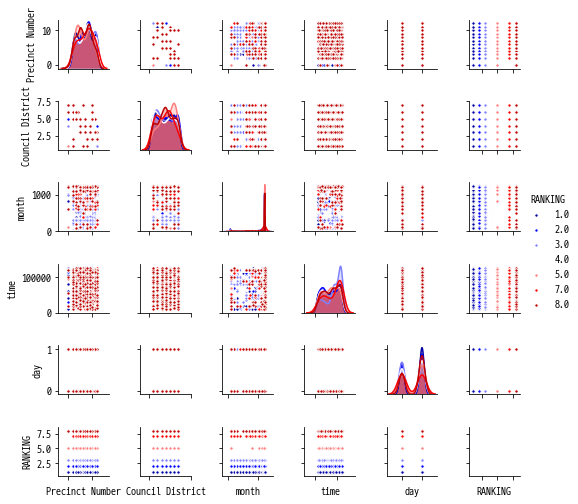

In [617]:
temp = dummy.iloc[:int(dummy.shape[0])].copy()


g = sns.pairplot(temp[[u'Precinct Number',u'Council District',u'uniq',u'month', u'time',  u'day',u'RANKING']], hue='RANKING', palette = 'seismic',size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])
g.savefig('correlation.png', dpi = 300)

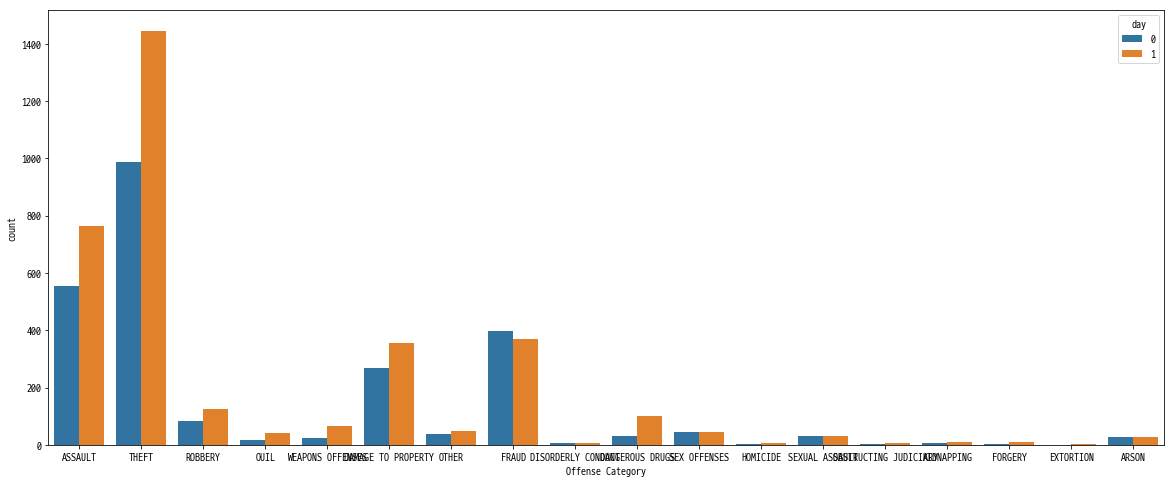

In [547]:
f1,ax = plt.subplots(1,1,figsize=(20,8))
sns.countplot('Offense Category',hue='day',data=dummy,ax=ax)

In [548]:
df_counts = pd.crosstab(dummy['Offense Category'], dummy['month'])
df_counts

month,101,102,103,104,105,106,107,108,109,110,...,1222,1223,1224,1225,1226,1227,1228,1229,1230,1231
Offense Category,,,,,,,,,,,,,,,,,,,,,
ARSON,0,1,0,0,0,0,0,0,0,0,...,3,2,2,3,6,4,0,2,2,0
ASSAULT,5,1,0,0,0,0,0,0,0,1,...,68,45,45,50,50,53,67,49,46,48
DAMAGE TO PROPERTY,0,0,0,0,1,0,1,0,1,0,...,31,18,18,14,23,27,33,18,29,36
DANGEROUS DRUGS,0,0,0,1,0,0,0,0,0,0,...,3,6,2,2,2,5,7,9,5,9
DISORDERLY CONDUCT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
EXTORTION,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FORGERY,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,3,1,0
FRAUD,15,0,1,0,4,2,1,0,1,0,...,21,14,13,3,6,14,13,18,14,7
HOMICIDE,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,1


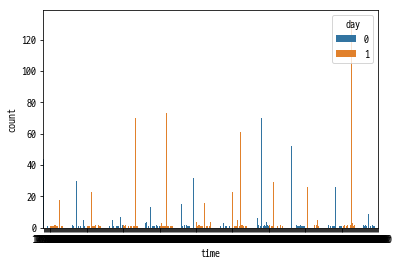

In [549]:
a = dummy[dummy['Offense Category']== 'THEFT']   
sns.countplot('time',hue= 'day',data = a)

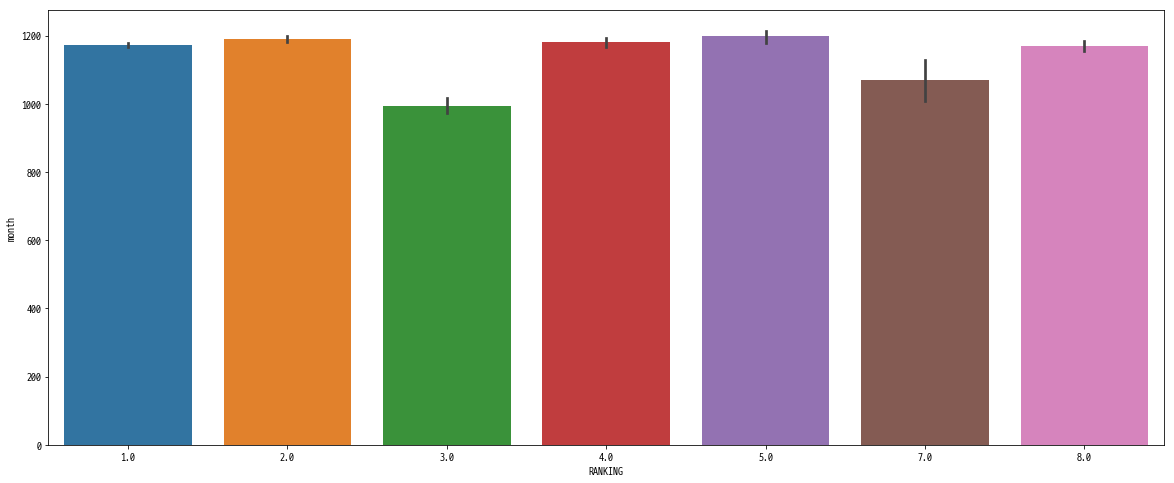

In [550]:
f,ax = plt.subplots(1,1,figsize=(20,8))
sns.barplot(dummy.RANKING,dummy.month, data=dummy,ax = ax)


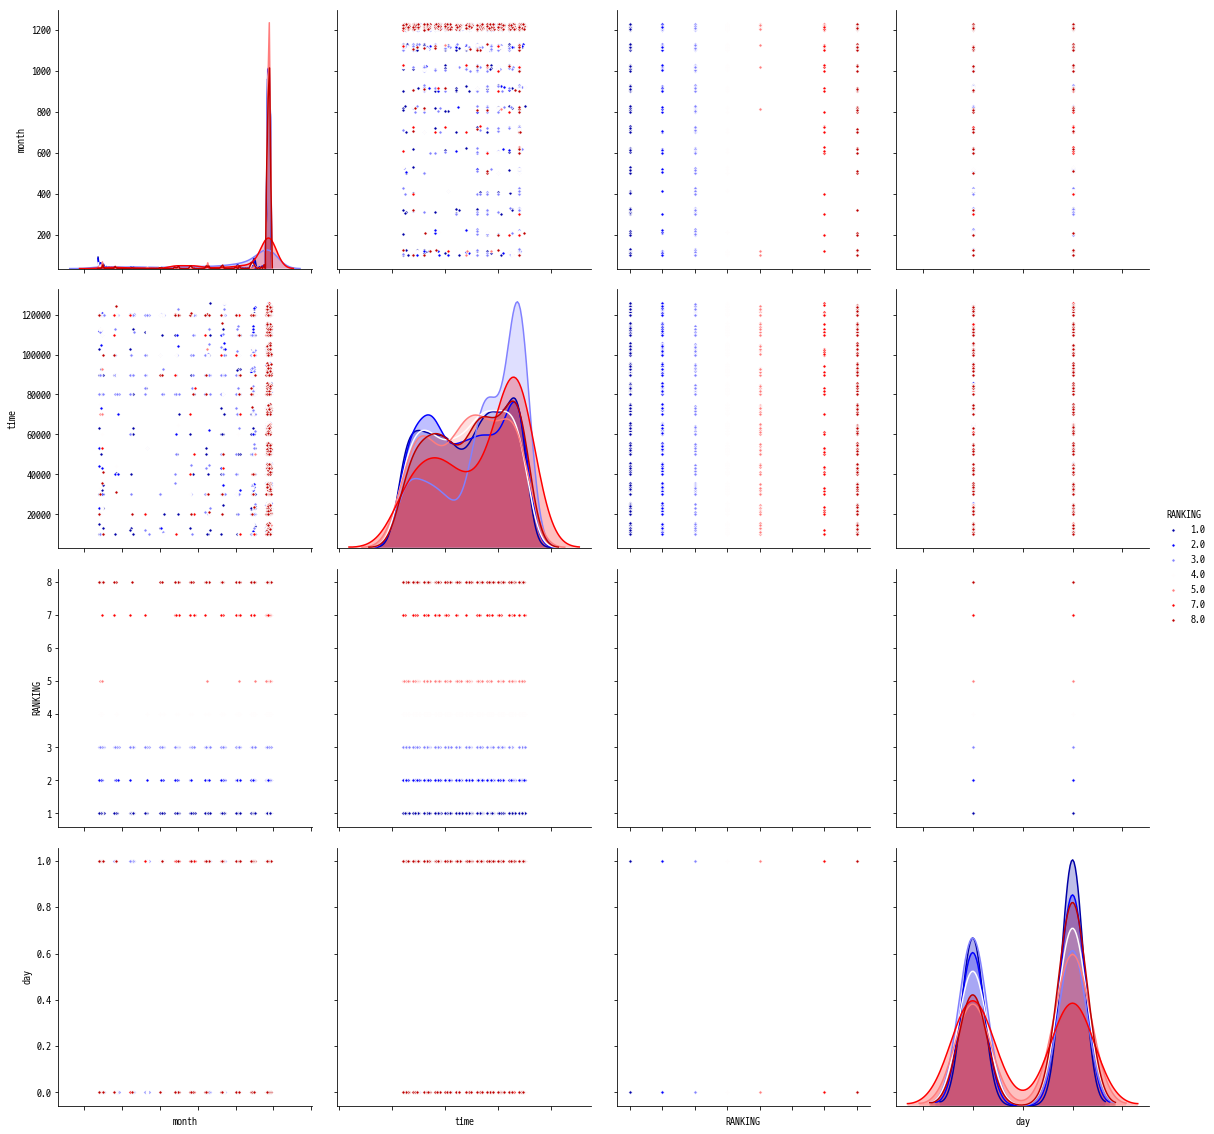

In [551]:
temp = dummy.iloc[:int(dummy.shape[0])].copy()
g = sns.pairplot(temp[[u'month', u'time',u'RANKING',u'day']], hue='RANKING', palette = 'seismic',size=4,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10))
g.set(xticklabels=[])

In [552]:
dummy.corr()

,Unnamed: 0,Crime ID,State Offense Code,Incident Time (24h),Day of Week (Sunday is 1),Hour of Day,Year,Scout Car Area,Precinct Number,Census Block GEOID,Council District,Zip Code,Longitude,Latitude,year,month,time,day,RANKING
Unnamed: 0,1.000000,0.020904,-0.004977,0.028868,0.004889,0.028608,NaN,-0.024207,-0.024464,0.018899,0.014255,NaN,0.006424,0.004215,NaN,-0.011189,0.008285,0.009584,-0.007937
Crime ID,0.020904,1.000000,0.015836,-0.100876,-0.018148,-0.096909,NaN,0.023632,0.023389,0.001397,-0.035926,NaN,-0.034961,-0.033497,NaN,-0.475811,0.144068,-0.050545,0.063800
State Offense Code,-0.004977,0.015836,1.000000,0.018387,0.002906,0.018399,NaN,-0.018628,-0.018392,-0.001451,-0.008062,NaN,-0.016880,-0.017535,NaN,-0.025910,0.019538,0.033482,0.463525
Incident Time (24h),0.028868,-0.100876,0.018387,1.000000,-0.000047,0.999665,NaN,-0.002090,-0.002207,-0.002165,-0.007332,NaN,0.006792,0.006810,NaN,0.099073,0.031035,0.838563,0.006266
Day of Week (Sunday is 1),0.004889,-0.018148,0.002906,-0.000047,1.000000,-0.000518,NaN,0.003399,0.003341,-0.006412,-0.010419,NaN,0.002480,0.004039,NaN,0.037046,0.004991,-0.000999,0.014889
Hour of Day,0.028608,-0.096909,0.018399,0.999665,-0.000518,1.000000,NaN,-0.001479,-0.001599,-0.002557,-0.007505,NaN,0.006503,0.006552,NaN,0.095195,0.032861,0.839488,0.003887
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Scout Car Area,-0.024207,0.023632,-0.018628,-0.002090,0.003399,-0.001479,NaN,1.000000,0.999938,0.014052,-0.502051,NaN,0.044116,0.100912,NaN,-0.030894,-0.006427,-0.014300,-0.036481
Precinct Number,-0.024464,0.023389,-0.018392,-0.002207,0.003341,-0.001599,NaN,0.999938,1.000000,0.013754,-0.503764,NaN,0.043539,0.100709,NaN,-0.030754,-0.006331,-0.014406,-0.035926
Census Block GEOID,0.018899,0.001397,-0.001451,-0.002165,-0.006412,-0.002557,NaN,0.014052,0.013754,1.000000,0.042281,NaN,0.003358,-0.008064,NaN,0.007909,0.001651,-0.016283,0.005907


In [553]:
kor_crime = pd.read_csv('/0.ITstudy/9.pandas_project/kor2016.csv')

In [554]:
kor_crime

,Unnamed: 0,계,서울,부산,대구,인천,광주,대전,울산,세종,...,경남 밀양,경남 사천,경남 양산,경남 진주,경남 창원,경남 통영,제주 서귀포,제주 제주,기타도시,도시이외
0,살인기수,356,46,29,17,20,9,16,7,1,...,2,-,3,2,3,-,-,4,2,51
1,살인미수등,558,100,43,12,28,8,9,15,1,...,-,3,1,3,15,3,1,11,2,49
2,강도,"1,149",260,137,51,88,47,35,33,3,...,4,1,7,6,26,1,1,24,1,46
3,강간,"5,155","1,129",314,197,347,170,171,112,10,...,8,5,31,32,68,15,16,68,11,366
4,유사강간,583,123,28,37,47,21,14,16,1,...,-,2,4,1,7,1,3,13,-,33
5,강제추행,"16,054","4,667",951,632,"1,176",488,420,293,40,...,12,25,76,74,202,27,95,223,39,743
6,기타 강간 강제추행등,408,72,30,14,27,15,15,9,-,...,-,4,1,3,7,3,1,7,3,47
7,방화,"1,502",286,98,68,84,38,44,38,2,...,5,2,5,6,29,-,11,15,4,135
8,절도범죄,"203,037","46,861","16,777","9,171","10,025","6,050","6,981","4,227",638,...,413,307,974,"1,700","3,760",551,927,"2,573",369,"9,839"
9,상해,"50,028","6,949","4,637","2,863","2,289","1,309","1,415","1,422",162,...,170,177,312,395,"1,243",372,344,638,124,"4,325"


In [555]:
kor_crime_data = pd.read_csv('/0.ITstudy/9.pandas_project/fixed.csv', index_col=0)
kor_crime_data

,계,서울,부산,대구,인천,광주,대전,울산,세종,경기 고양,...,경남 밀양,경남 사천,경남 양산,경남 진주,경남 창원,경남 통영,제주 서귀포,제주 제주,기타도시,도시이외
강간,5155,1129,314,197,347,170,171,112,10,83,...,8,5,31,32,68,15,16,68,11,366
강도,1149,260,137,51,88,47,35,33,3,11,...,4,1,7,6,26,1,1,24,1,46
강제추행,16054,4667,951,632,1176,488,420,293,40,247,...,12,25,76,74,202,27,95,223,39,743
공갈,3745,694,416,192,255,114,130,95,30,46,...,8,4,15,44,60,10,17,42,19,218
교통범죄,600401,74270,32944,31682,30972,22137,14524,14105,1234,12280,...,1243,1908,3760,3749,12594,2430,4060,11642,1287,43990
기타범죄,260539,44407,22296,10712,14952,4809,5268,4784,495,4025,...,392,534,1476,1349,4535,2308,1265,3480,1187,17984
도박범죄,13446,2149,1137,943,483,401,560,752,28,128,...,8,13,55,52,309,75,47,244,140,748
마약범죄,7329,1449,963,334,641,75,117,78,8,92,...,40,25,33,128,164,27,5,34,19,720
"문서,인장",13295,2932,1212,558,668,444,403,279,39,198,...,13,46,54,77,237,25,45,127,90,848
방화,1502,286,98,68,84,38,44,38,2,22,...,5,2,5,6,29,0,11,15,4,135


In [556]:
kor_dummy = kor_crime_data.copy()

In [557]:
kor_dummy.index.name = '범죄'

In [558]:
kor_dummy

,계,서울,부산,대구,인천,광주,대전,울산,세종,경기 고양,...,경남 밀양,경남 사천,경남 양산,경남 진주,경남 창원,경남 통영,제주 서귀포,제주 제주,기타도시,도시이외
범죄,,,,,,,,,,,,,,,,,,,,,
강간,5155,1129,314,197,347,170,171,112,10,83,...,8,5,31,32,68,15,16,68,11,366
강도,1149,260,137,51,88,47,35,33,3,11,...,4,1,7,6,26,1,1,24,1,46
강제추행,16054,4667,951,632,1176,488,420,293,40,247,...,12,25,76,74,202,27,95,223,39,743
공갈,3745,694,416,192,255,114,130,95,30,46,...,8,4,15,44,60,10,17,42,19,218
교통범죄,600401,74270,32944,31682,30972,22137,14524,14105,1234,12280,...,1243,1908,3760,3749,12594,2430,4060,11642,1287,43990
기타범죄,260539,44407,22296,10712,14952,4809,5268,4784,495,4025,...,392,534,1476,1349,4535,2308,1265,3480,1187,17984
도박범죄,13446,2149,1137,943,483,401,560,752,28,128,...,8,13,55,52,309,75,47,244,140,748
마약범죄,7329,1449,963,334,641,75,117,78,8,92,...,40,25,33,128,164,27,5,34,19,720
"문서,인장",13295,2932,1212,558,668,444,403,279,39,198,...,13,46,54,77,237,25,45,127,90,848


In [559]:
kor_dummy.info()
kor_ranking = kor_dummy.sum()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 강간 to 폭행
Data columns (total 88 columns):
계         19 non-null int64
서울        19 non-null int64
부산        19 non-null int64
대구        19 non-null int64
인천        19 non-null int64
광주        19 non-null int64
대전        19 non-null int64
울산        19 non-null int64
세종        19 non-null int64
경기 고양     19 non-null int64
경기 과천     19 non-null int64
경기 광명     19 non-null int64
경기 광주     19 non-null int64
경기 구리     19 non-null int64
경기 군포     19 non-null int64
경기 김포     19 non-null int64
경기 남양주    19 non-null int64
경기 동두천    19 non-null int64
경기 부천     19 non-null int64
경기 성남     19 non-null int64
경기 수원     19 non-null int64
경기 시흥     19 non-null int64
경기 안산     19 non-null int64
경기 안성     19 non-null int64
경기 안양     19 non-null int64
경기 양주     19 non-null int64
경기 여주     19 non-null int64
경기 오산     19 non-null int64
경기 용인     19 non-null int64
경기 의왕     19 non-null int64
경기 의정부    19 non-null int64
경기 이천     19 non-null int64
경기 파주

In [560]:
kor_ranking = kor_ranking.sort_values(ascending=False)

In [561]:
kor_ranking10 = kor_ranking[1:11]

In [562]:
kor_ranking10

서울       324300
부산       127825
도시이외     109155
인천        98459
대구        83568
광주        52800
경기 수원     48841
대전        47076
울산        38942
경기 성남     36215
dtype: int64

In [563]:
kor_ranking20 = kor_ranking[1:31]
kor_ranking20

서울        324300
부산        127825
도시이외      109155
인천         98459
대구         83568
광주         52800
경기 수원      48841
대전         47076
울산         38942
경기 성남      36215
경기 안산      35219
경기 부천      34903
경남 창원      34690
경기 고양      30097
충북 청주      28624
제주 제주      26312
경기 평택      24388
경기 용인      24157
경기 시흥      22842
충남 천안      22797
경기 화성      21948
경남 김해      18931
경기 안양      18582
전북 전주      18264
경북 구미      17406
경북 포항      17353
경기 남양주     17250
경기 파주      14683
강원 원주      14522
경기 의정부     14202
dtype: int64

In [564]:
safe = kor_ranking.sort_values(ascending=True)
safe.to_csv('safe.csv')

In [565]:

seoul=kor_dummy['서울']
busan = kor_dummy['부산']
others = kor_dummy ['도시이외']
daegu = kor_dummy['대구']
incheon = kor_dummy['인천']
kwangju = kor_dummy['광주']
daejeon = kor_dummy['대전']
ulsan = kor_dummy['울산']
suwon = kor_dummy['경기 수원']
sungnam = kor_dummy['경기 성남']

In [566]:
seoul

범죄
강간        1129
강도         260
강제추행      4667
공갈         694
교통범죄     74270
기타범죄     44407
도박범죄      2149
마약범죄      1449
문서,인장     2932
방화         286
사기       84037
살인기수        46
살인미수등      100
손괴       11667
안보범죄        19
유사강간       123
절도범죄     46861
체포,감금      303
폭행       48901
Name: 서울, dtype: int64

In [567]:
# Matplotlib에서 한글을 사용하기 위한 설정
from matplotlib import font_manager, rc, rcParams
import matplotlib.pyplot as plt

rcParams['axes.unicode_minus'] = False  # - 기호 깨짐 방지
font_fname = 'C:\\WINDOWS\\Fonts\\D2Coding-Ver1.3.2-20180524.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()
print(font_family)
rc('font', family=font_family)

# 한글 설정인식 오류시 단 한번만 실행
#from matplotlib import font_manager
#font_manager._rebuild()

D2Coding


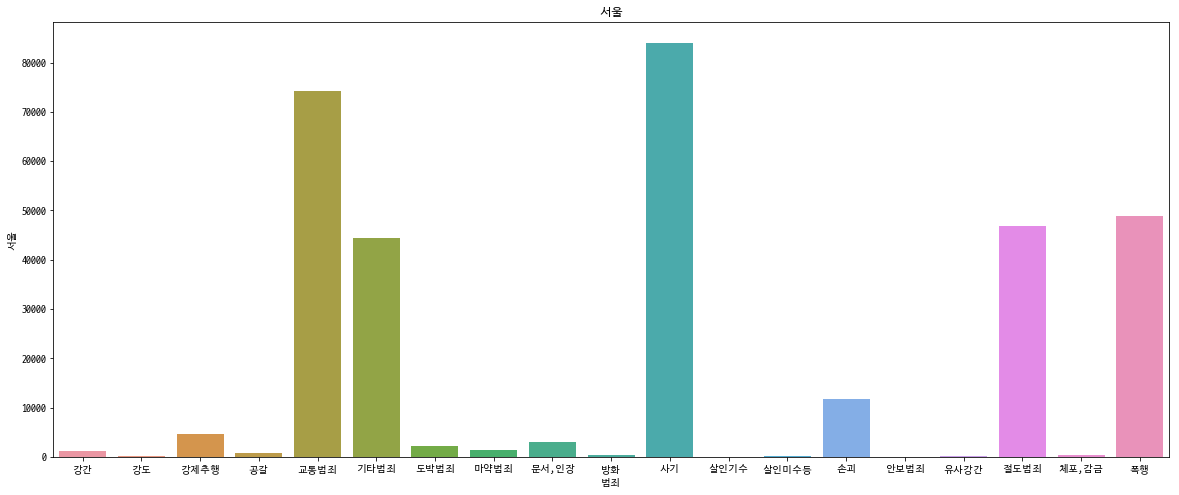

In [621]:
f,ax = plt.subplots(1,1,figsize = (20,8))
sns.barplot(x = '범죄', y = '서울', data = kor_dummy.reset_index(), ax = ax)
ax.set_title('서울')
#fig = ax.get_figure()
#fig.savefig('seoul_before_edit.png', dpi = 300)

Text(0.5,1,'부산')

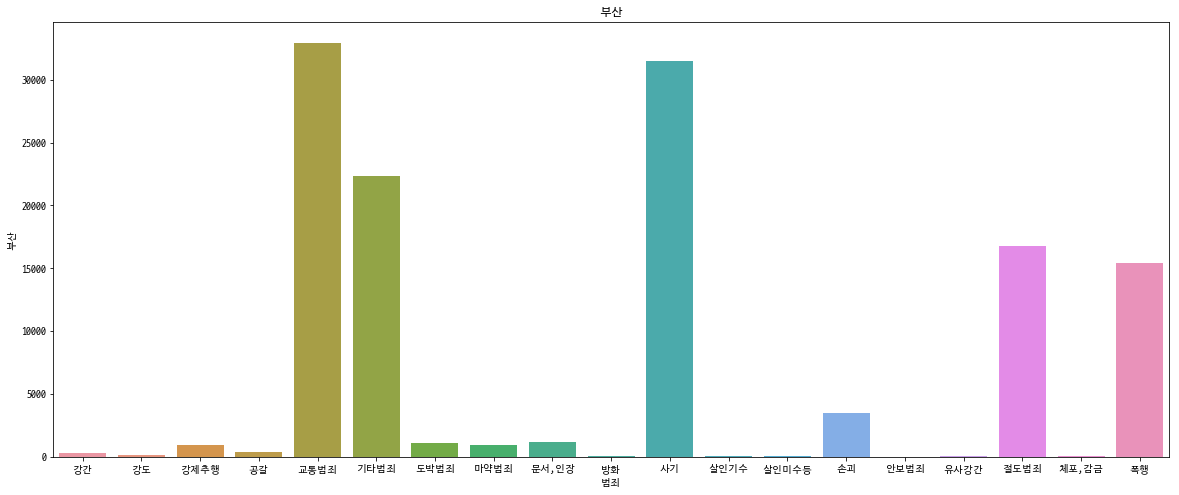

In [569]:
f,ax = plt.subplots(1,1,figsize = (20,8))
sns.barplot(x = '범죄', y = '부산', data = kor_dummy.reset_index(), ax = ax)
ax.set_title('부산')

Text(0.5,1,'도시이외')

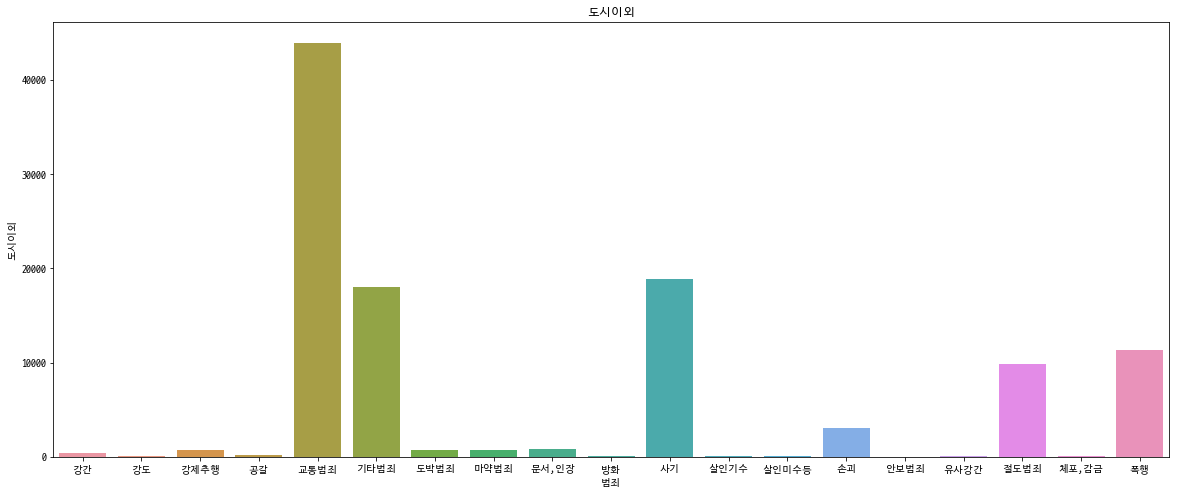

In [570]:
f,ax = plt.subplots(1,1,figsize = (20,8))
sns.barplot(x = '범죄', y = '도시이외', data = kor_dummy.reset_index(), ax = ax)
ax.set_title('도시이외')

Text(0.5,1,'대구')

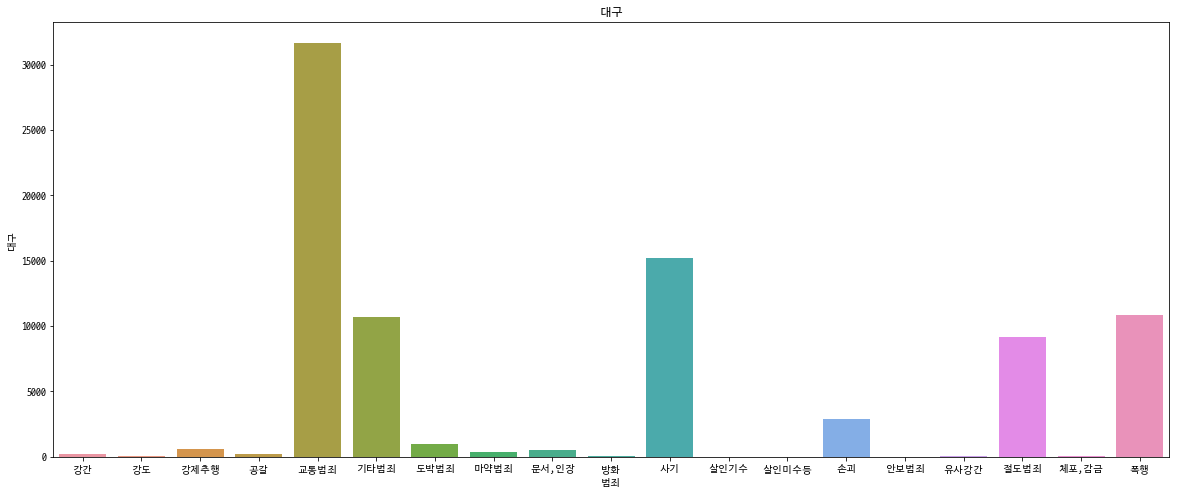

In [571]:
f,ax = plt.subplots(1,1,figsize = (20,8))
sns.barplot(x = '범죄', y = '대구', data = kor_dummy.reset_index(), ax = ax)
ax.set_title('대구')

Text(0.5,1,'광주')

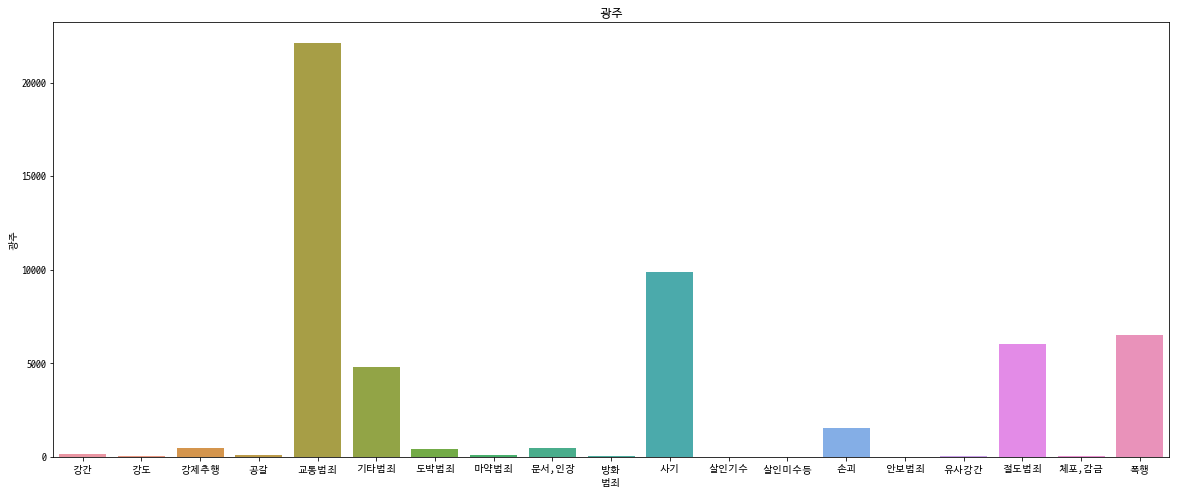

In [572]:
f,ax = plt.subplots(1,1,figsize = (20,8))
sns.barplot(x = '범죄', y = '광주', data = kor_dummy.reset_index(), ax = ax)
ax.set_title('광주')

Text(0.5,1,'경기 수원')

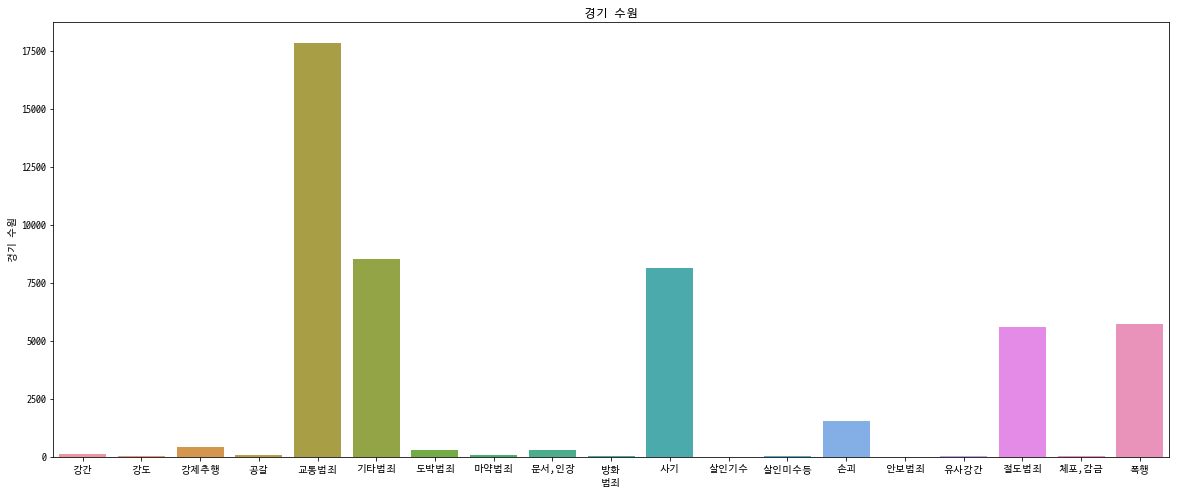

In [573]:
f,ax = plt.subplots(1,1,figsize = (20,8))
sns.barplot(x = '범죄', y = '경기 수원', data = kor_dummy.reset_index(), ax = ax)
ax.set_title('경기 수원')

Text(0.5,1,'대전')

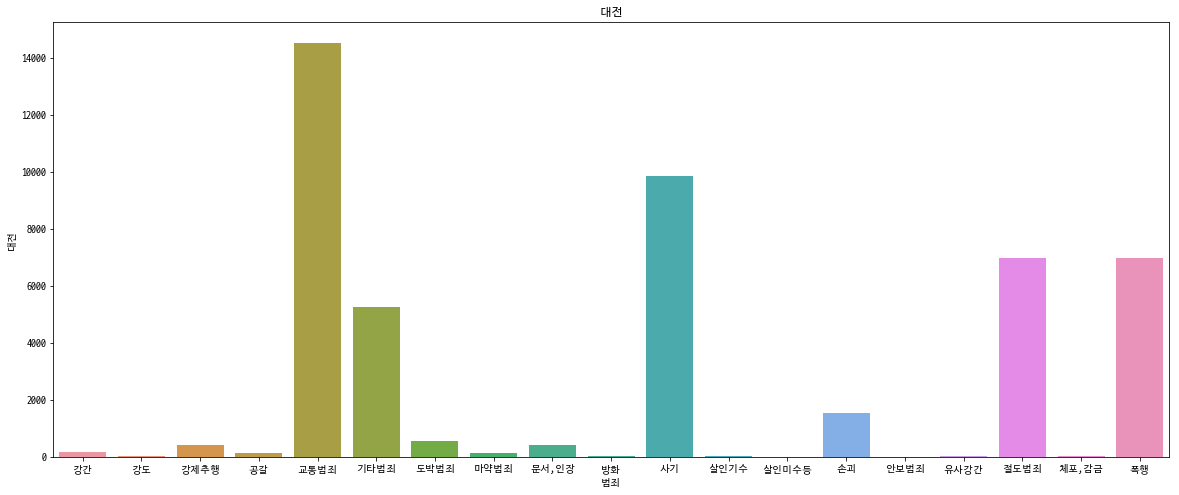

In [574]:
f,ax = plt.subplots(1,1,figsize = (20,8))
sns.barplot(x = '범죄', y = '대전', data = kor_dummy.reset_index(), ax = ax)
ax.set_title('대전')

Text(0.5,1,'울산')

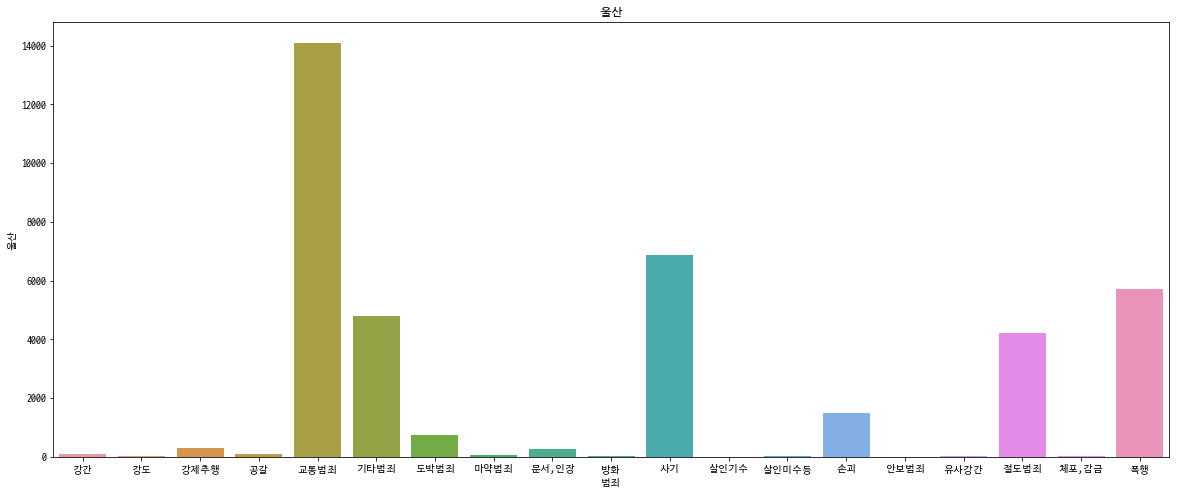

In [575]:
f,ax = plt.subplots(1,1,figsize = (20,8))
sns.barplot(x = '범죄', y = '울산', data = kor_dummy.reset_index(), ax = ax)
ax.set_title('울산')

Text(0.5,1,'경기 성남')

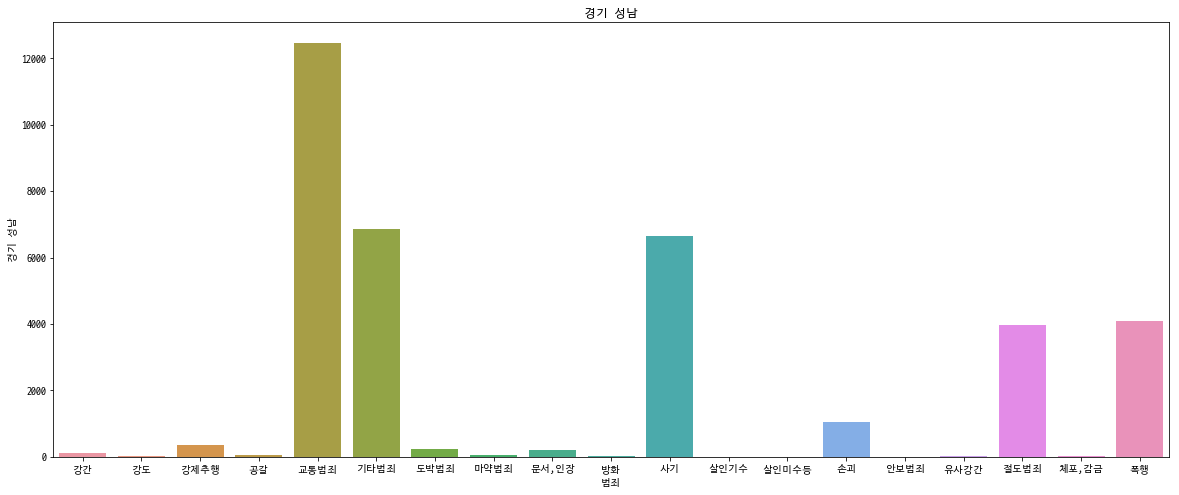

In [576]:
f,ax = plt.subplots(1,1,figsize = (20,8))
sns.barplot(x = '범죄', y = '경기 성남', data = kor_dummy.reset_index(), ax = ax)
ax.set_title('경기 성남')

In [577]:
kor_dummy_final=kor_dummy.drop(['교통범죄'])

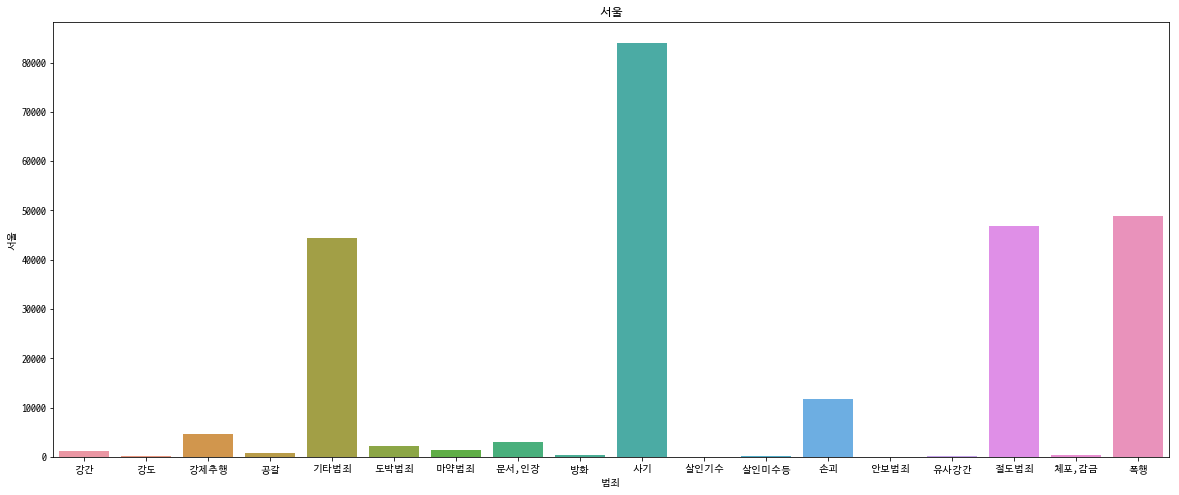

In [622]:
f,ax = plt.subplots(1,1,figsize = (20,8))
sns.barplot(x = '범죄', y = '서울', data = kor_dummy_final.reset_index(), ax = ax)
ax.set_title('서울')
#fig = ax.get_figure()
#fig.savefig('seoul_after_edit.png', dpi = 300)

Text(0.5,1,'서울')

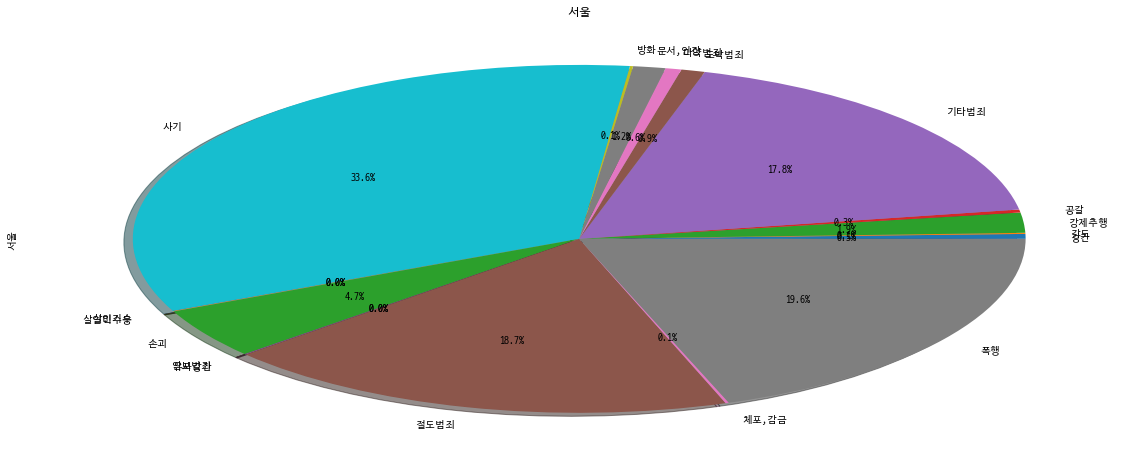

In [579]:
f,ax = plt.subplots(1,1,figsize = (20,8))
plt_pie =kor_dummy_final['서울'].plot.pie(explode = [0]*18,autopct='%1.1f%%',ax = ax,shadow = True)
ax.set_title('서울')


Text(0.5,1,'부산')

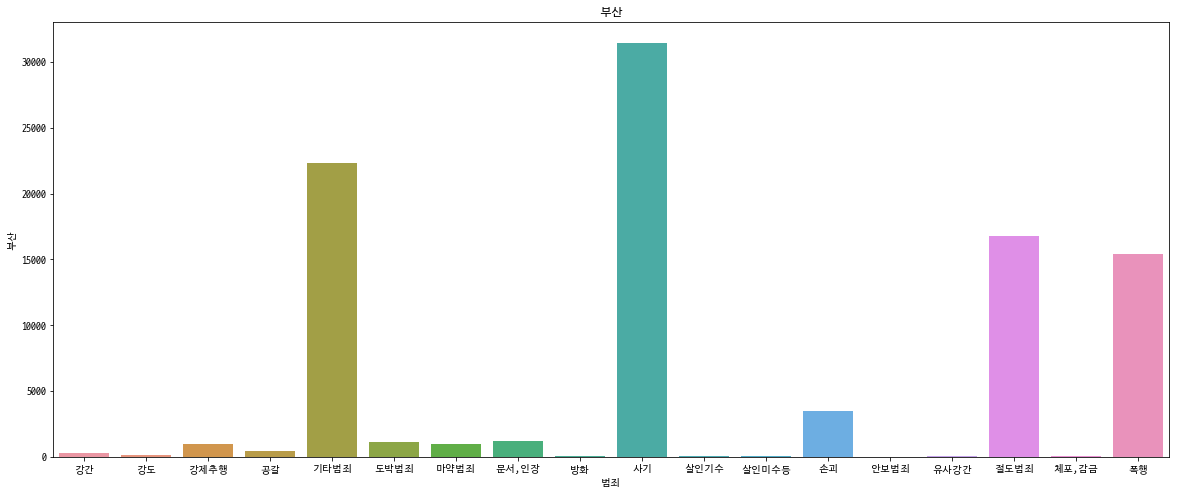

In [580]:
f,ax = plt.subplots(1,1,figsize = (20,8))
sns.barplot(x = '범죄', y = '부산', data = kor_dummy_final.reset_index(), ax = ax)
ax.set_title('부산')

Text(0.5,1,'부산')

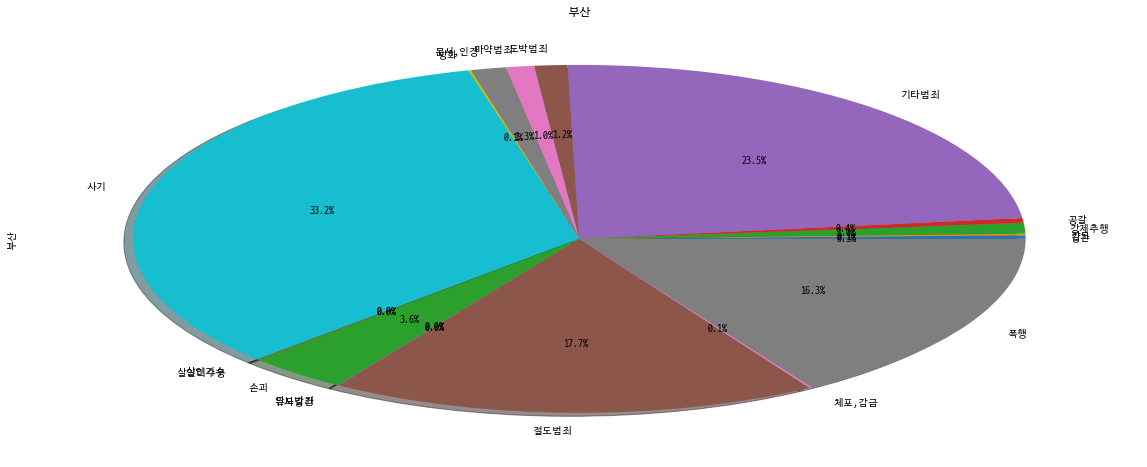

In [581]:
f, ax = plt.subplots(1,1,figsize = (20,8))
plt_pie =kor_dummy_final['부산'].plot.pie(explode = [0]*18,autopct='%1.1f%%',ax = ax,shadow = True)
ax.set_title('부산')

Text(0.5,1,'도시이외')

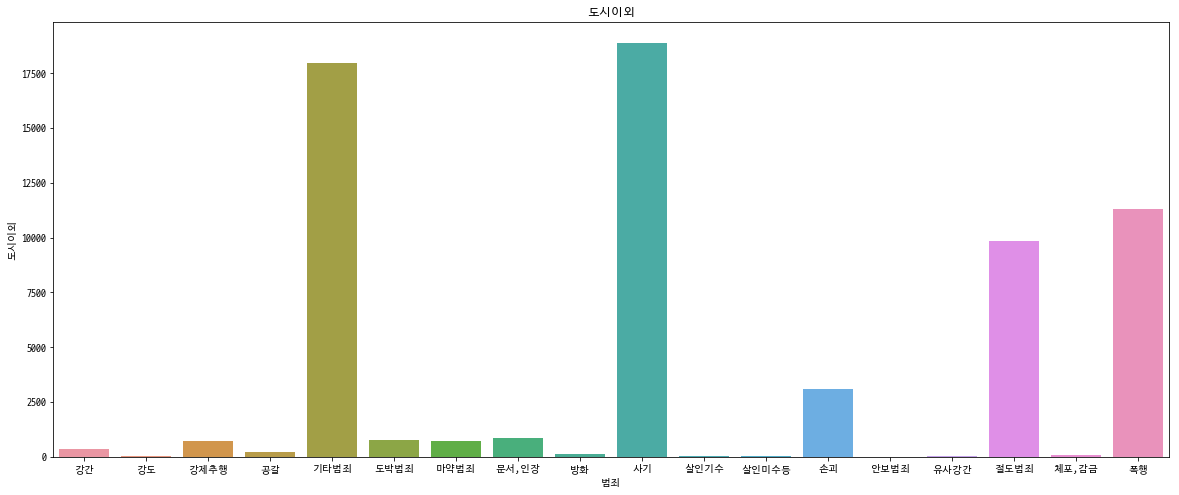

In [582]:
f,ax = plt.subplots(1,1,figsize = (20,8))
sns.barplot(x = '범죄', y = '도시이외', data = kor_dummy_final.reset_index(), ax = ax)
ax.set_title('도시이외')

Text(0.5,1,'도시이외')

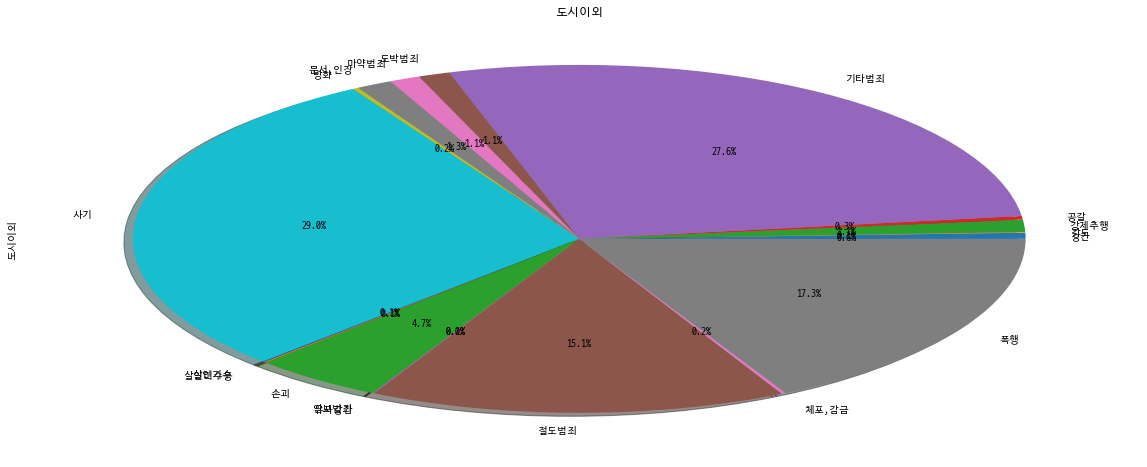

In [583]:
f, ax = plt.subplots(1,1,figsize = (20,8))
plt_pie =kor_dummy_final['도시이외'].plot.pie(explode = [0]*18,autopct='%1.1f%%',ax = ax,shadow = True)
ax.set_title('도시이외')

Text(0.5,1,'인천')

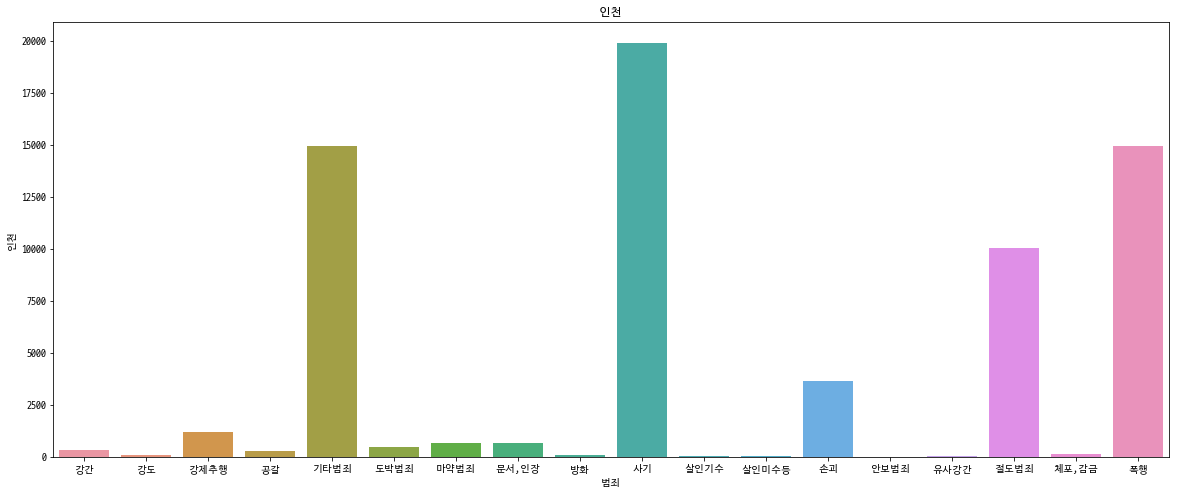

In [584]:
f,ax = plt.subplots(1,1,figsize = (20,8))
sns.barplot(x = '범죄', y = '인천', data = kor_dummy_final.reset_index(), ax = ax)
ax.set_title('인천')

Text(0.5,1,'인천')

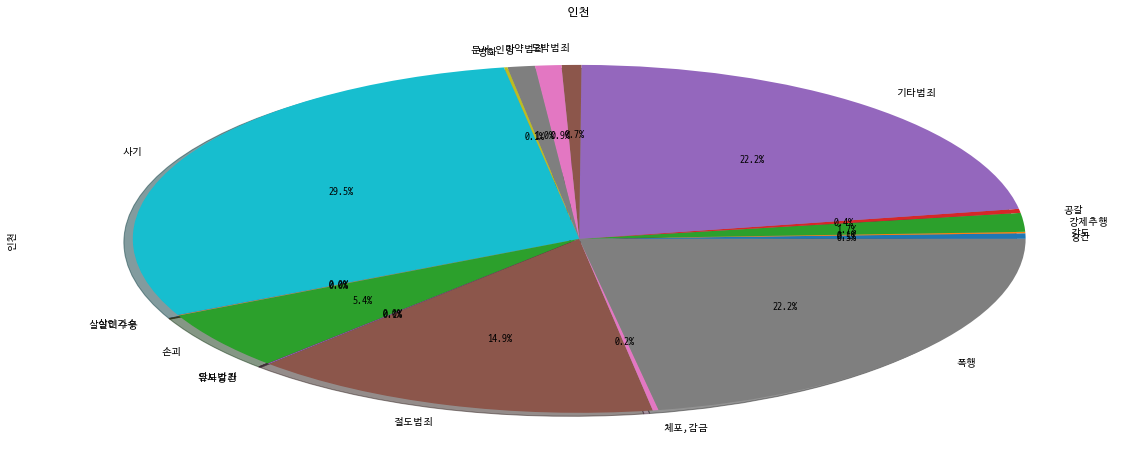

In [585]:
f, ax = plt.subplots(1,1,figsize = (20,8))
plt_pie =kor_dummy_final['인천'].plot.pie(explode = [0]*18,autopct='%1.1f%%',ax = ax,shadow = True)
ax.set_title('인천')

Text(0.5,1,'대구')

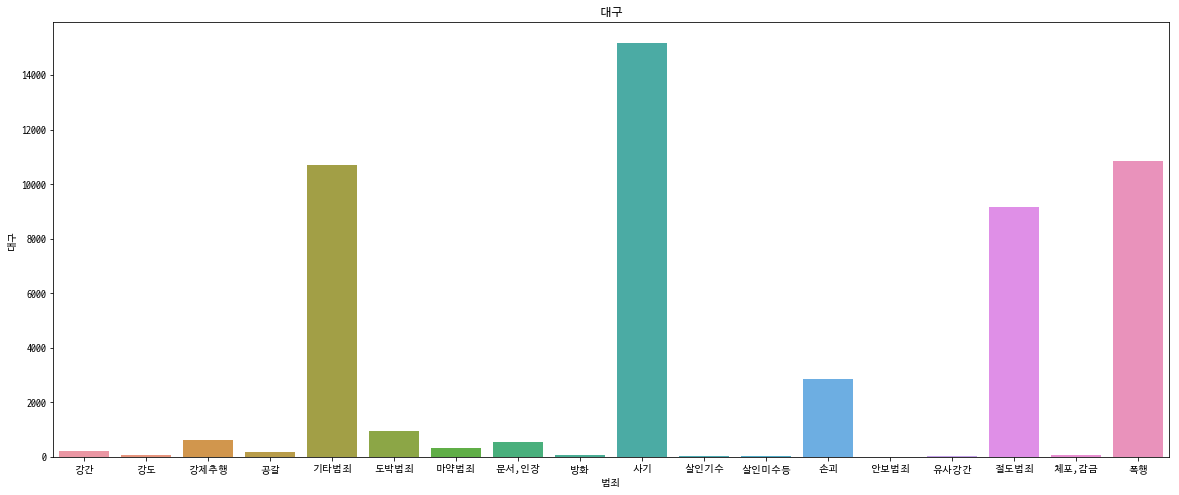

In [586]:
f,ax = plt.subplots(1,1,figsize = (20,8))
sns.barplot(x = '범죄', y = '대구', data = kor_dummy_final.reset_index(), ax = ax)
ax.set_title('대구')

Text(0.5,1,'대구')

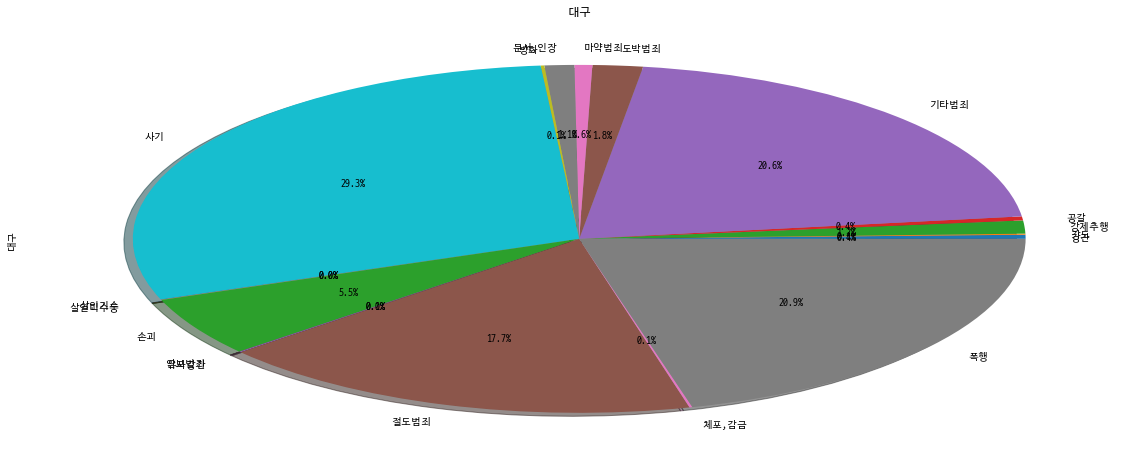

In [587]:
f, ax = plt.subplots(1,1,figsize = (20,8))
plt_pie =kor_dummy_final['대구'].plot.pie(explode = [0]*18,autopct='%1.1f%%',ax = ax,shadow = True)
ax.set_title('대구')

Text(0.5,1,'광주')

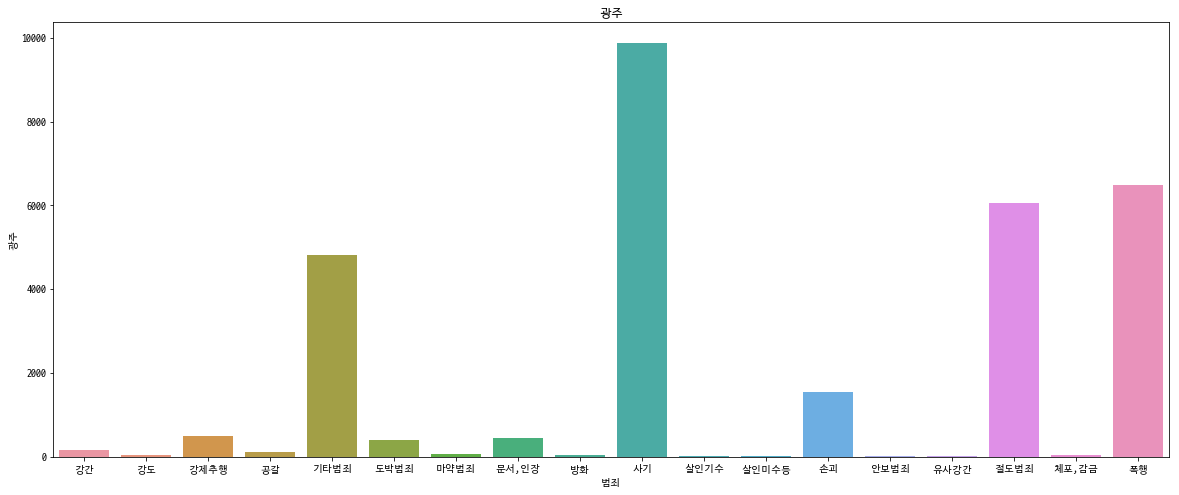

In [588]:
f,ax = plt.subplots(1,1,figsize = (20,8))
sns.barplot(x = '범죄', y = '광주', data = kor_dummy_final.reset_index(), ax = ax)
ax.set_title('광주')

Text(0.5,1,'광주')

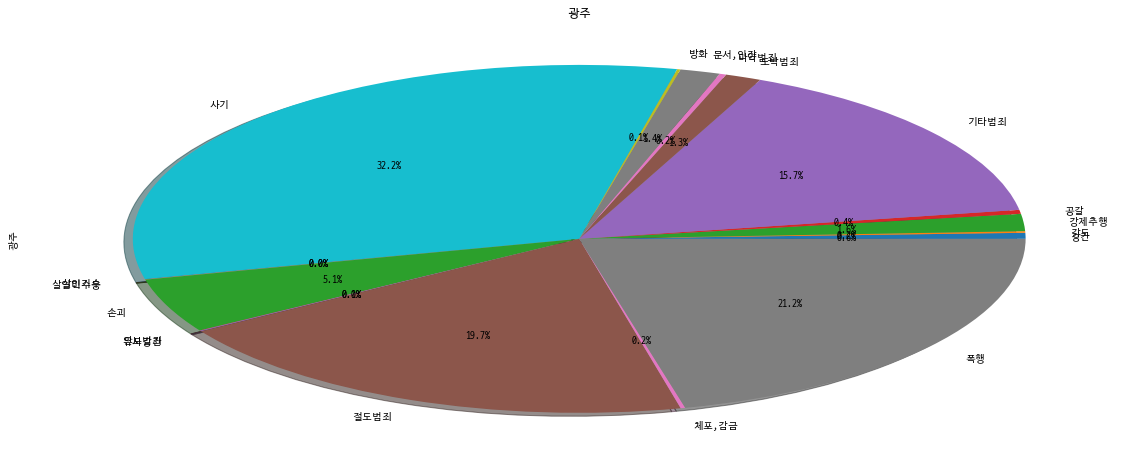

In [589]:
f, ax = plt.subplots(1,1,figsize = (20,8))
plt_pie =kor_dummy_final['광주'].plot.pie(explode = [0]*18,autopct='%1.1f%%',ax = ax,shadow = True)
ax.set_title('광주')

Text(0.5,1,'경기 수원')

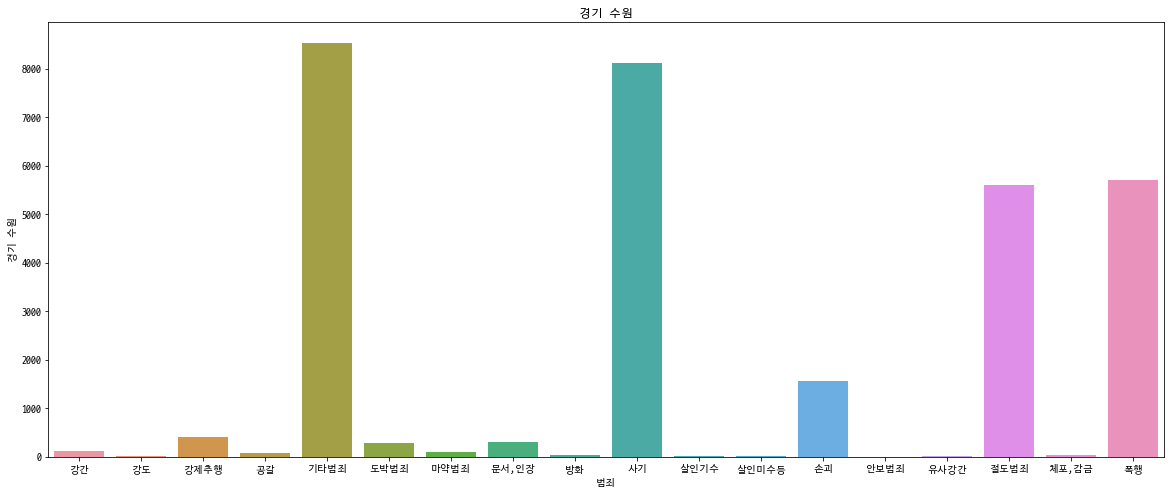

In [590]:
f,ax = plt.subplots(1,1,figsize = (20,8))
sns.barplot(x = '범죄', y = '경기 수원', data = kor_dummy_final.reset_index(), ax = ax)
ax.set_title('경기 수원')

Text(0.5,1,'경기 수원')

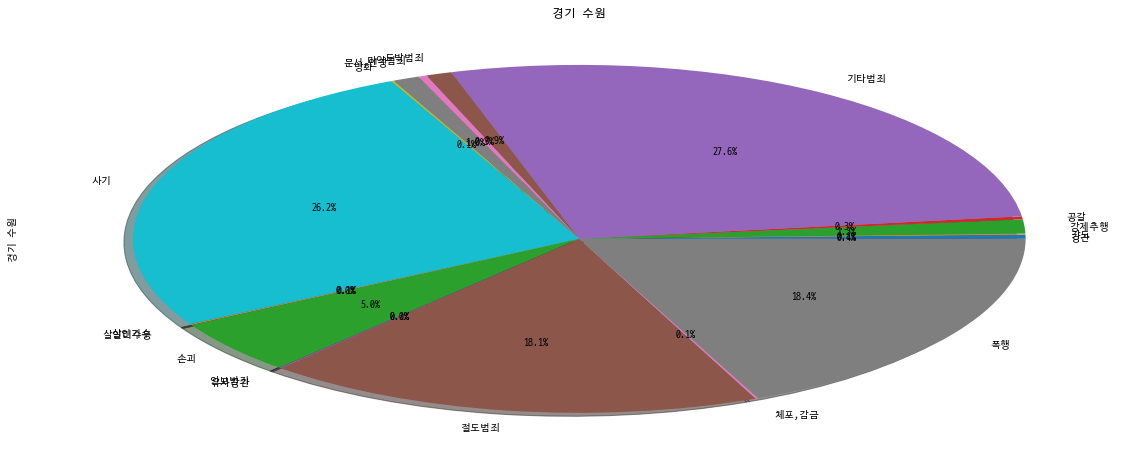

In [591]:
f, ax = plt.subplots(1,1,figsize = (20,8))
plt_pie =kor_dummy_final['경기 수원'].plot.pie(explode = [0]*18,autopct='%1.1f%%',ax = ax,shadow = True)
ax.set_title('경기 수원')

Text(0.5,1,'대전')

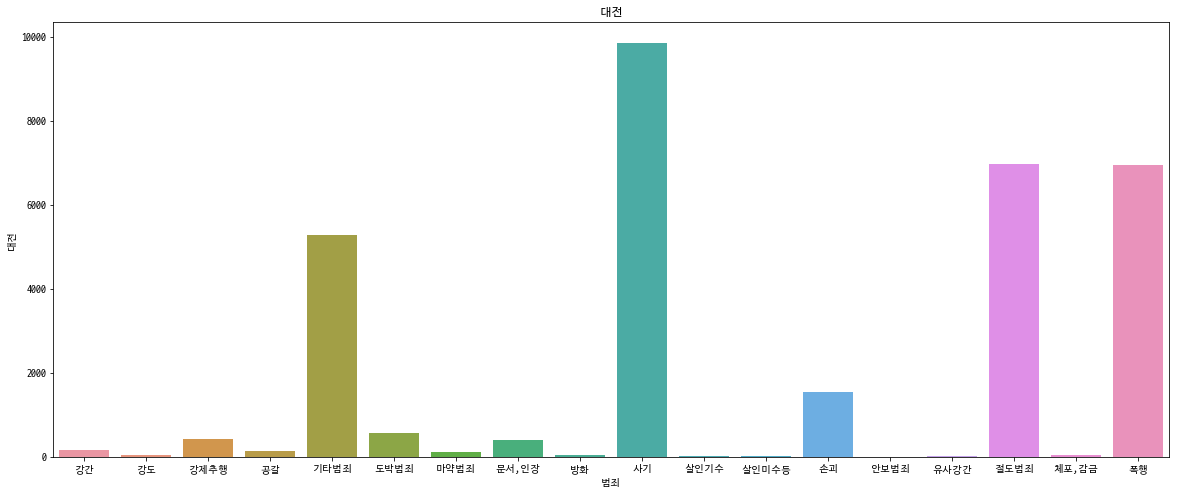

In [592]:
f,ax = plt.subplots(1,1,figsize = (20,8))
sns.barplot(x = '범죄', y = '대전', data = kor_dummy_final.reset_index(), ax = ax)
ax.set_title('대전')

Text(0.5,1,'대전')

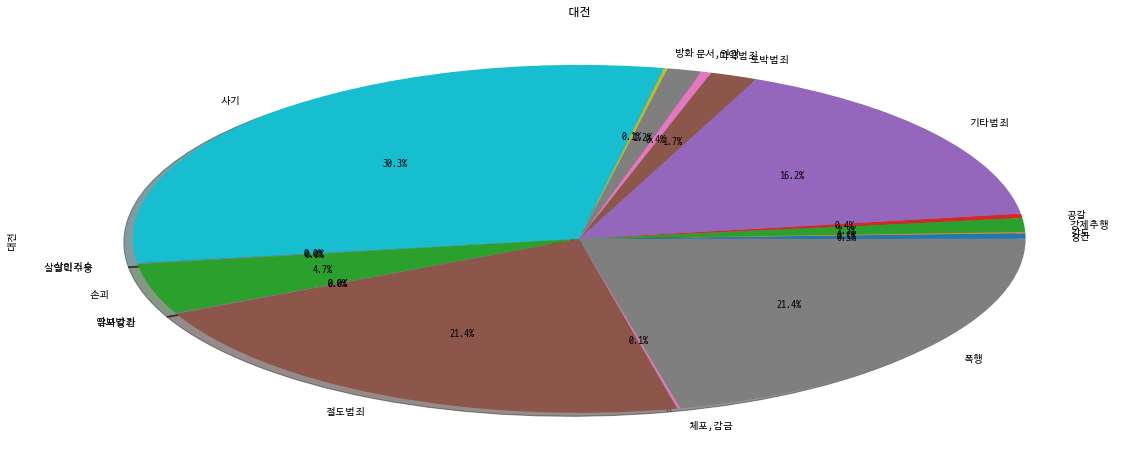

In [593]:
f, ax = plt.subplots(1,1,figsize = (20,8))
plt_pie =kor_dummy_final['대전'].plot.pie(explode = [0]*18,autopct='%1.1f%%',ax = ax,shadow = True)
ax.set_title('대전')

Text(0.5,1,'울산')

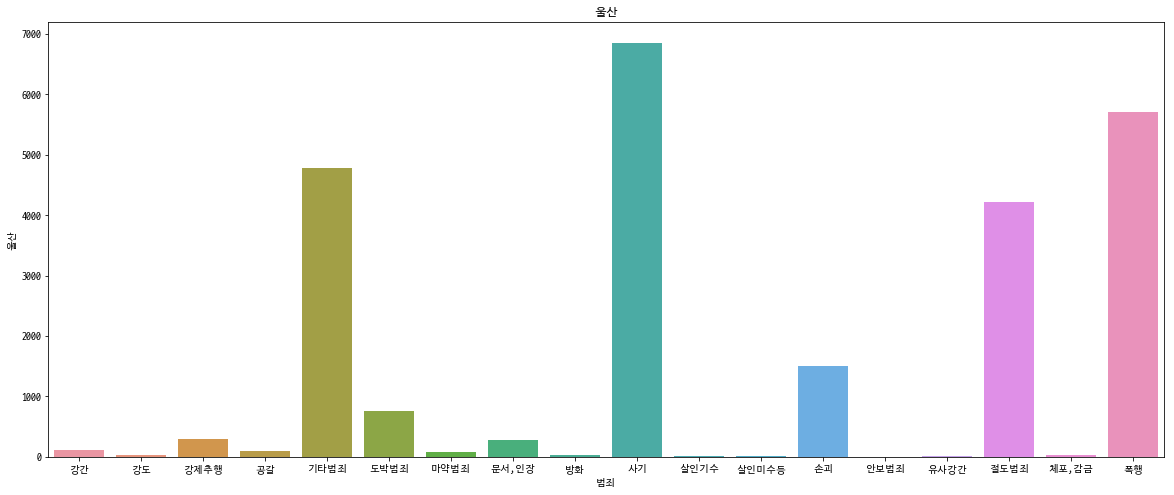

In [594]:
f,ax = plt.subplots(1,1,figsize = (20,8))
sns.barplot(x = '범죄', y = '울산', data = kor_dummy_final.reset_index(), ax = ax)
ax.set_title('울산')

Text(0.5,1,'울산')

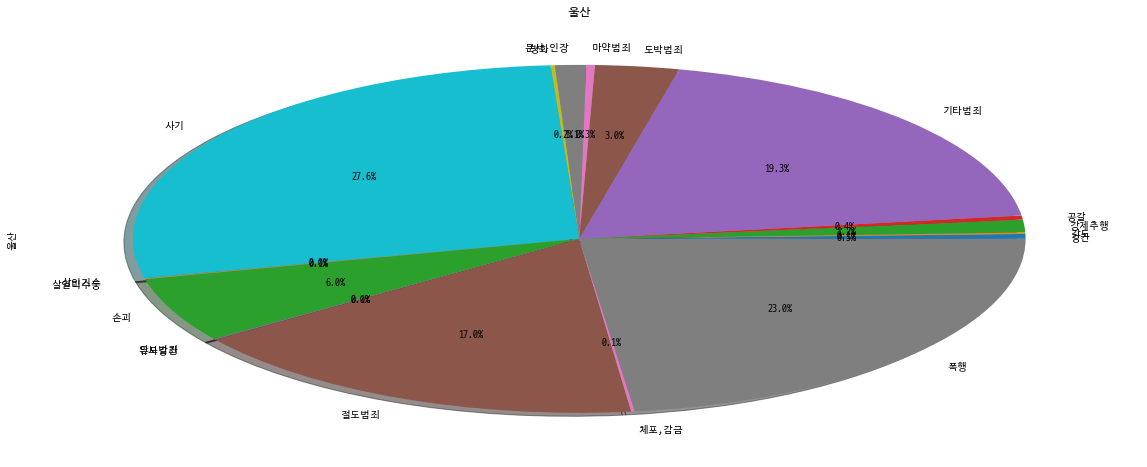

In [595]:
f, ax = plt.subplots(1,1,figsize = (20,8))
plt_pie =kor_dummy_final['울산'].plot.pie(explode = [0]*18,autopct='%1.1f%%',ax = ax,shadow = True)
ax.set_title('울산')

Text(0.5,1,'경기 성남')

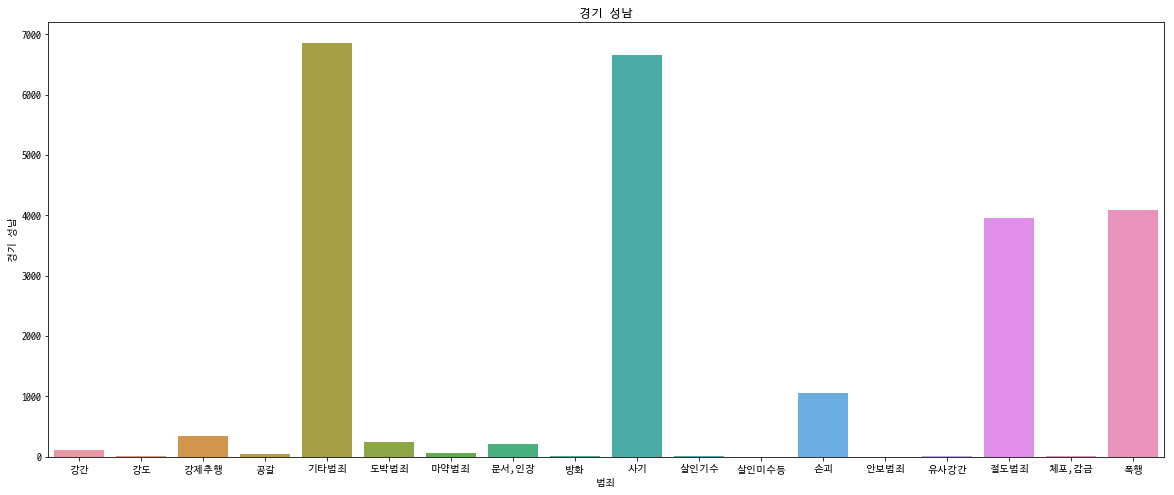

In [596]:
f,ax = plt.subplots(1,1,figsize = (20,8))
sns.barplot(x = '범죄', y = '경기 성남', data = kor_dummy_final.reset_index(), ax = ax)
ax.set_title('경기 성남')

Text(0.5,1,'경기 성남')

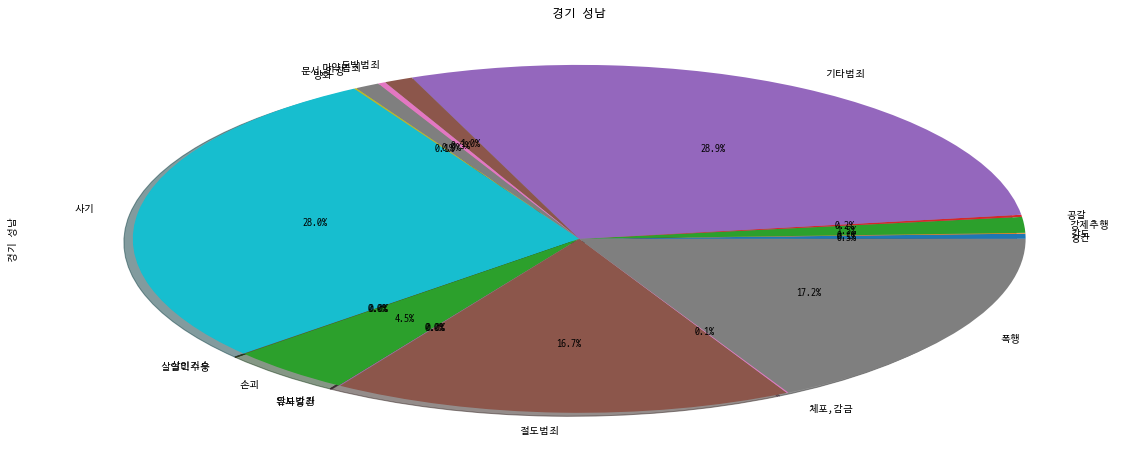

In [597]:
f, ax = plt.subplots(1,1,figsize = (20,8))
plt_pie =kor_dummy_final['경기 성남'].plot.pie(explode = [0]*18,autopct='%1.1f%%',ax = ax,shadow = True)
ax.set_title('경기 성남')

In [639]:
province = re.compile(r'[가-힣]+[ ]+[가-힣]+')
province.findall('경기 의저부')

['경기 의저부']

In [640]:
city = pd.Series(kor_dummy_final.columns)


In [641]:
#province.findall(kor_dummy_final.columns)
def province_gyung(x):
    provin_reg = re.compile(r'[가-힣]+[ ]+[가-힣]+')
    return(provin_reg.findall(x))

In [642]:
city_list = []
def reg_city():
    for i in city.apply(province_gyung):
        if len(i) > 0:
            city_list.append(i[0])
    return city_list
reg_city()

['경기 고양',
 '경기 과천',
 '경기 광명',
 '경기 광주',
 '경기 구리',
 '경기 군포',
 '경기 김포',
 '경기 남양주',
 '경기 동두천',
 '경기 부천',
 '경기 성남',
 '경기 수원',
 '경기 시흥',
 '경기 안산',
 '경기 안성',
 '경기 안양',
 '경기 양주',
 '경기 여주',
 '경기 오산',
 '경기 용인',
 '경기 의왕',
 '경기 의정부',
 '경기 이천',
 '경기 파주',
 '경기 평택',
 '경기 포천',
 '경기 하남',
 '경기 화성',
 '강원 강릉',
 '강원 동해',
 '강원 삼척',
 '강원 속초',
 '강원 원주',
 '강원 춘천',
 '강원 태백',
 '충북 제천',
 '충북 청주',
 '충북 충주',
 '충남 계룡',
 '충남 공주',
 '충남 논산',
 '충남 당진',
 '충남 보령',
 '충남 서산',
 '충남 아산',
 '충남 천안',
 '전북 군산',
 '전북 김제',
 '전북 남원',
 '전북 익산',
 '전북 전주',
 '전북 정읍',
 '전남 광양',
 '전남 나주',
 '전남 목포',
 '전남 순천',
 '전남 여수',
 '경북 경산',
 '경북 경주',
 '경북 구미',
 '경북 김천',
 '경북 문경',
 '경북 상주',
 '경북 안동',
 '경북 영주',
 '경북 영천',
 '경북 포항',
 '경남 거제',
 '경남 김해',
 '경남 밀양',
 '경남 사천',
 '경남 양산',
 '경남 진주',
 '경남 창원',
 '경남 통영',
 '제주 서귀포',
 '제주 제주']

In [704]:
kor_dummy_final_province = kor_dummy_final.copy()

In [705]:
city_dict = {}
for city in city_list:
    if city not in city_dict:
        city_dict[city] = city.split()[0]
city_dict        

{'경기 고양': '경기',
 '경기 과천': '경기',
 '경기 광명': '경기',
 '경기 광주': '경기',
 '경기 구리': '경기',
 '경기 군포': '경기',
 '경기 김포': '경기',
 '경기 남양주': '경기',
 '경기 동두천': '경기',
 '경기 부천': '경기',
 '경기 성남': '경기',
 '경기 수원': '경기',
 '경기 시흥': '경기',
 '경기 안산': '경기',
 '경기 안성': '경기',
 '경기 안양': '경기',
 '경기 양주': '경기',
 '경기 여주': '경기',
 '경기 오산': '경기',
 '경기 용인': '경기',
 '경기 의왕': '경기',
 '경기 의정부': '경기',
 '경기 이천': '경기',
 '경기 파주': '경기',
 '경기 평택': '경기',
 '경기 포천': '경기',
 '경기 하남': '경기',
 '경기 화성': '경기',
 '강원 강릉': '강원',
 '강원 동해': '강원',
 '강원 삼척': '강원',
 '강원 속초': '강원',
 '강원 원주': '강원',
 '강원 춘천': '강원',
 '강원 태백': '강원',
 '충북 제천': '충북',
 '충북 청주': '충북',
 '충북 충주': '충북',
 '충남 계룡': '충남',
 '충남 공주': '충남',
 '충남 논산': '충남',
 '충남 당진': '충남',
 '충남 보령': '충남',
 '충남 서산': '충남',
 '충남 아산': '충남',
 '충남 천안': '충남',
 '전북 군산': '전북',
 '전북 김제': '전북',
 '전북 남원': '전북',
 '전북 익산': '전북',
 '전북 전주': '전북',
 '전북 정읍': '전북',
 '전남 광양': '전남',
 '전남 나주': '전남',
 '전남 목포': '전남',
 '전남 순천': '전남',
 '전남 여수': '전남',
 '경북 경산': '경북',
 '경북 경주': '경북',
 '경북 구미': '경북',
 '경북 김천': '경북',
 '경북 문경': '경북',
 '경북 

In [706]:
kor_dummy_final_province = kor_dummy_final_province.rename(index=str, columns=city_dict )

In [713]:
kor_dummy_final_province.colurms().sum()

AttributeError: 'DataFrame' object has no attribute 'colums'

In [710]:
kor_dummy_final_province.drop_duplicates()

TypeError: drop_duplicates() got an unexpected keyword argument 'axis'

In [702]:
kor_dummy_final_province=kor_dummy_final_province.groupby(kor_dummy_final_province.index,as_index=False,).agg('sum')

In [703]:
kor_dummy_final_province

범죄,강간,강도,강제추행,공갈,기타범죄,도박범죄,마약범죄,"문서,인장",방화,사기,살인기수,살인미수등,손괴,안보범죄,유사강간,절도범죄,"체포,감금",폭행
0,150,22,264,64,5714,162,158,285,39,6513,7,11,1890,2,19,4047,27,6660
1,1144,185,3644,759,77652,2445,1255,2837,325,80212,84,157,14679,17,129,44120,338,54287
2,208,60,600,183,13853,709,611,632,74,18959,17,29,2982,5,25,11199,72,11848
3,204,40,398,177,7006,832,261,489,58,13095,16,18,2521,0,15,8093,56,8072
4,5155,1149,16054,3745,260539,13446,7329,13295,1502,356691,356,558,59127,81,583,203037,1519,229133
5,170,47,488,114,4809,401,75,444,38,9885,9,8,1550,8,21,6050,51,6495
6,11,1,39,19,1187,140,19,90,4,2848,2,2,77,2,0,369,9,354
7,197,51,632,192,10712,943,334,558,68,15195,17,12,2856,2,37,9171,55,10854
8,171,35,420,130,5268,560,117,403,44,9858,16,9,1537,1,14,6981,34,6954
9,366,46,743,218,17984,748,720,848,135,18899,51,49,3080,3,33,9839,102,11301
